# **1 Import Libarary:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2 Over view data base:**

## 2.1 Import data set:

### 2.1.1 INDIAN Export - Exploration:

In [2]:
exp = pd.read_csv('2018-2010_export.csv')

In [3]:
exp.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


#### 🔍Checking data type and null value:

In [4]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     137023 non-null  int64  
 1   Commodity  137023 non-null  object 
 2   value      122985 non-null  float64
 3   country    137023 non-null  object 
 4   year       137023 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


🌟Data type is good.

In [5]:
exp.isnull().sum()

,0
HSCode,0
Commodity,0
value,14038
country,0
year,0


📝Fill in null value by 0 in value column

In [6]:
exp['value']= exp['value'].fillna(0)

#### 🔍Checking HS code, commodities and country value:

 🛒 HS Code Column

In [7]:
unique_HScode = exp['HSCode'].unique()
print (unique_HScode)

[ 2  3  4  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 47 48 49 50 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 76 78 79 81 82 83
 84 85 86 87 88 90 91 92 94 95 96 97 98 99  5 43 26 45 75 80 93 89 46 51
 16  1]


In [8]:
print("Count of HScode " + str(len(unique_HScode)))

Count of HScode 98


In [9]:
unique_Commodity = exp['Commodity'].unique()
print (unique_Commodity)

['MEAT AND EDIBLE MEAT OFFAL.'
 'FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATIC INVERTABRATES.'
 "DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIBLE PROD. OF ANIMAL ORIGIN, NOT ELSEWHERE SPEC. OR INCLUDED."
 'LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND THE LIKE; CUT FLOWERS AND ORNAMENTAL FOLIAGE.'
 'EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.'
 'EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.'
 'COFFEE, TEA, MATE AND SPICES.' 'CEREALS.'
 'PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.'
 'OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEEDS AND FRUIT; INDUSTRIAL OR MEDICINAL PLANTS; STRAW AND FODDER.'
 'LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND EXTRACTS.'
 'VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.'
 'ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.'
 'SUGARS AND SUGAR CONFECTIONERY.' 'COCOA AND COCOA PREPARATIONS.'
 'PREPARATIONS OF CEREALS, FLO

In [10]:
print("Count of Commodity " + str(len(unique_Commodity)))

Count of Commodity 98


Review HSCode and commodity column by unique:

In [11]:
unique_data = exp[['HSCode', 'Commodity']].drop_duplicates()
print (unique_data)

      HSCode                                          Commodity
0          2                        MEAT AND EDIBLE MEAT OFFAL.
1          3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...
2          4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
3          6  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...
4          7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.
...      ...                                                ...
352       89              SHIPS, BOATS AND FLOATING STRUCTURES.
461       46  MANUFACTURES OF STRAW, OF ESPARTO OR OF OTHER ...
465       51  WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YA...
635       16  PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...
1037       1                                      LIVE ANIMALS.

[98 rows x 2 columns]


🎉 Missing HS code 77.
Overview, We can see HSCode group:
* (1, 5), "group_name": "Animal & Animal Products",
* (6, 15), "group_name": "Vegetable Products",
* (16, 24), "group_name": "Foodstuffs",
* (25, 27), "group_name": "Mineral Products",
* (28, 38), "group_name": "Chemicals & Allied Industries",
* (39, 40), "group_name": "Plastics / Rubbers",
* (41, 43), "group_name": "Raw Hides, Skins, Leather, & Furs",
* (44, 49), "group_name": "Wood & Wood Products",
* (50, 63), "group_name": "Textiles",
* (64, 67), "group_name": "Footwear / Headgear",
* (68, 71), "group_name": "Stone / Glass",
* (72, 83), "group_name": "Metals",
* (84, 85), "group_name": "Machinery / Electrical",
* (86, 89), "group_name": "Transportation",
* (90, 99), "group_name": "Miscellaneous",

We create new CommodityGroup Column to reduce dimension.

In [12]:
new_hs_group_mapping = [
    {"range": (1, 5), "group_name": "Animal & Animal Products"},
    {"range": (6, 15), "group_name": "Vegetable Products"},
    {"range": (16, 24), "group_name": "Foodstuffs"},
    {"range": (25, 27), "group_name": "Mineral Products"},
    {"range": (28, 38), "group_name": "Chemicals & Allied Industries"},
    {"range": (39, 40), "group_name": "Plastics / Rubbers"},
    {"range": (41, 43), "group_name": "Raw Hides, Skins, Leather, & Furs"},
    {"range": (44, 49), "group_name": "Wood & Wood Products"},
    {"range": (50, 63), "group_name": "Textiles"},
    {"range": (64, 67), "group_name": "Footwear / Headgear"},
    {"range": (68, 71), "group_name": "Stone / Glass"},
    {"range": (72, 83), "group_name": "Metals"},
    {"range": (84, 85), "group_name": "Machinery / Electrical"},
    {"range": (86, 89), "group_name": "Transportation"},
    {"range": (90, 99), "group_name": "Miscellaneous"}
]

In [13]:
def get_commodity_group(hscode, mapping):
      for entry in mapping:
        min_hscode, max_hscode = entry["range"]
        if min_hscode <= hscode <= max_hscode:
            return entry["group_name"]

In [14]:
exp = exp.assign(CommodityGroup = exp['HSCode'].apply(lambda x: get_commodity_group(x, new_hs_group_mapping)))

In [15]:
exp.head()

,HSCode,Commodity,value,country,year,CommodityGroup
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018,Animal & Animal Products
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018,Animal & Animal Products
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018,Animal & Animal Products
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018,Vegetable Products
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018,Vegetable Products


🗺️ Country Column:

In [16]:
unique_country = exp['country'].unique()
print(unique_country)

['AFGHANISTAN TIS' 'ALBANIA' 'ALGERIA' 'AMERI SAMOA' 'ANDORRA' 'ANGOLA'
 'ANGUILLA' 'ANTARTICA' 'ANTIGUA' 'ARGENTINA' 'ARMENIA' 'ARUBA'
 'AUSTRALIA' 'AUSTRIA' 'AZERBAIJAN' 'BAHAMAS' 'BAHARAIN IS'
 'BANGLADESH PR' 'BARBADOS' 'BELARUS' 'BELGIUM' 'BELIZE' 'BENIN' 'BERMUDA'
 'BHUTAN' 'BOLIVIA' 'BOSNIA-HRZGOVIN' 'BOTSWANA' 'BR VIRGN IS' 'BRAZIL'
 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI' 'C AFRI REP' 'CAMBODIA'
 'CAMEROON' 'CANADA' 'CAPE VERDE IS' 'CAYMAN IS' 'CHAD' 'CHILE'
 'CHINA P RP' 'COLOMBIA' 'COMOROS' 'CONGO D. REP.' 'CONGO P REP' 'COOK IS'
 'COSTA RICA' "COTE D' IVOIRE" 'CROATIA' 'CUBA' 'CURACAO' 'CYPRUS'
 'CZECH REPUBLIC' 'DENMARK' 'DJIBOUTI' 'DOMINIC REP' 'DOMINICA' 'ECUADOR'
 'EGYPT A RP' 'EL SALVADOR' 'EQUTL GUINEA' 'ERITREA' 'ESTONIA' 'ETHIOPIA'
 'FALKLAND IS' 'FAROE IS.' 'FIJI IS' 'FINLAND' 'FR GUIANA' 'FR POLYNESIA'
 'FRANCE' 'GABON' 'GAMBIA' 'GEORGIA' 'GERMANY' 'GHANA' 'GIBRALTAR'
 'GREECE' 'GREENLAND' 'GRENADA' 'GUADELOUPE' 'GUAM' 'GUATEMALA' 'GUERNSEY'
 'GUINEA' 'GUINEA

In [17]:
print("Count of country Exported: "+ str(len(exp['country'].unique())))

Count of country Exported: 248


🎉 Some countries maybe wrong typing, therefore we update correction.
 * AFGHANISTAN TIS - AFGHANISTAN
 * ALBANIA, DM RP - ALBANIA
 * VIRGIN IS USE REP - VIRGIN US

In [18]:
exp['country'] = exp['country'].replace('AFGHANISTAN TIS', 'AFGHANISTAN')
exp['country'] = exp['country'].replace('ALBANIA, DM RP', 'ALBANIA')
exp['country'] = exp['country'].replace('VIRGIN IS USE REP', 'VIRGIN US')

### 2.1.2 INDIAN Import - Exploration:

In [19]:
imp = pd.read_csv('2018-2010_import.csv')

In [20]:
imp.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


#### 🔍Checking data type and null value:

In [21]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76124 entries, 0 to 76123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     76124 non-null  int64  
 1   Commodity  76124 non-null  object 
 2   value      64536 non-null  float64
 3   country    76124 non-null  object 
 4   year       76124 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


🌟Data type is good.

In [22]:
imp.isnull().sum()

,0
HSCode,0
Commodity,0
value,11588
country,0
year,0


📝Fill in null value by 0 in value column

In [23]:
imp['value']= imp['value'].fillna(0)

#### 🔍Checking HS code, commodities and country value:

🛒 HS Code Column

In [24]:
unique_HScode = imp['HSCode'].unique()
print (unique_HScode)

[ 5  7  8  9 11 12 13 20 25 27 39 41 49 51 52 57 68 71 72 74 81 82 84 85
 90 96 97 98 99 18 26 33 40 48 64 70 73 76 83 87 94 28 29 30 31 38 45 47
 78 86 59 63 34 44 69 79 54 22 32  1  3  4  6 10 15 23 24 35 42 55 93 95
 17  2 19 21 37 46 50 53 56 58 60 61 62 65 66 67 75 88 89 91 92 16 43 80
 14 36]


In [25]:
print("Count of HScode " + str(len(unique_HScode)))

Count of HScode 98


In [26]:
unique_Commodity = imp['Commodity'].unique()
print (unique_Commodity)

['PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.'
 'EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.'
 'EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR MELONS.'
 'COFFEE, TEA, MATE AND SPICES.'
 'PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCHES; INULIN; WHEAT GLUTEN.'
 'OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEEDS AND FRUIT; INDUSTRIAL OR MEDICINAL PLANTS; STRAW AND FODDER.'
 'LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND EXTRACTS.'
 'PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTHER PARTS OF PLANTS.'
 'SALT; SULPHUR; EARTHS AND STONE; PLASTERING MATERIALS, LIME AND CEMENT.'
 'MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.'
 'PLASTIC AND ARTICLES THEREOF.'
 'RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER'
 'PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER PRODUCTS OF THE PRINTING INDUSTRY; MANUSCRIPTS, TYPESCRIPTS AND PLANS.'
 'WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YARN AND WOVEN FABRIC.'
 'COTTON.' 'CA

In [27]:
print("Count of Commodity " + str(len(unique_Commodity)))

Count of Commodity 98


Review HSCode and commodity column by unique:

In [28]:
unique_data = imp[['HSCode', 'Commodity']].drop_duplicates()
print (unique_data)

      HSCode                                          Commodity
0          5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...
1          7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.
2          8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...
3          9                      COFFEE, TEA, MATE AND SPICES.
4         11  PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...
...      ...                                                ...
314       16  PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...
338       43  FURSKINS AND ARTIFICIAL FUR, MANUFACTURES THER...
374       80                          TIN AND ARTICLES THEREOF.
752       14  VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUC...
1224      36  EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYR...

[98 rows x 2 columns]


🎉 Missing HS code 77. Overview, We can see HSCode group:

* (1, 5), "group_name": "Animal & Animal Products",
* (6, 15), "group_name": "Vegetable Products",
* (16, 24), "group_name": "Foodstuffs",
* (25, 27), "group_name": "Mineral Products",
* (28, 38), "group_name": "Chemicals & Allied Industries",
* (39, 40), "group_name": "Plastics / Rubbers",
* (41, 43), "group_name": "Raw Hides, Skins, Leather, & Furs",
* (44, 49), "group_name": "Wood & Wood Products",
* (50, 63), "group_name": "Textiles",
* (64, 67), "group_name": "Footwear / Headgear",
* (68, 71), "group_name": "Stone / Glass",
* (72, 83), "group_name": "Metals",
* (84, 85), "group_name": "Machinery / Electrical",
* (86, 89), "group_name": "Transportation",
* (90, 99), "group_name": "Miscellaneous",

We create new CommodityGroup Column to reduce dimension.

In [29]:
new_hs_group_mapping = [
    {"range": (1, 5), "group_name": "Animal & Animal Products"},
    {"range": (6, 15), "group_name": "Vegetable Products"},
    {"range": (16, 24), "group_name": "Foodstuffs"},
    {"range": (25, 27), "group_name": "Mineral Products"},
    {"range": (28, 38), "group_name": "Chemicals & Allied Industries"},
    {"range": (39, 40), "group_name": "Plastics / Rubbers"},
    {"range": (41, 43), "group_name": "Raw Hides, Skins, Leather, & Furs"},
    {"range": (44, 49), "group_name": "Wood & Wood Products"},
    {"range": (50, 63), "group_name": "Textiles"},
    {"range": (64, 67), "group_name": "Footwear / Headgear"},
    {"range": (68, 71), "group_name": "Stone / Glass"},
    {"range": (72, 83), "group_name": "Metals"},
    {"range": (84, 85), "group_name": "Machinery / Electrical"},
    {"range": (86, 89), "group_name": "Transportation"},
    {"range": (90, 99), "group_name": "Miscellaneous"}
]

In [30]:
def get_commodity_group(hscode, mapping):
      for entry in mapping:
        min_hscode, max_hscode = entry["range"]
        if min_hscode <= hscode <= max_hscode:
            return entry["group_name"]

In [31]:
imp = imp.assign(CommodityGroup = exp['HSCode'].apply(lambda x: get_commodity_group(x, new_hs_group_mapping)))

In [32]:
imp.head()

,HSCode,Commodity,value,country,year,CommodityGroup
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018,Animal & Animal Products
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018,Animal & Animal Products
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018,Animal & Animal Products
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018,Vegetable Products
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,0.00,AFGHANISTAN TIS,2018,Vegetable Products


🗺️ Country Column:

In [33]:
unique_country = imp['country'].unique()
print(unique_country)

['AFGHANISTAN TIS' 'ALBANIA' 'ALGERIA' 'AMERI SAMOA' 'ANDORRA' 'ANGOLA'
 'ANGUILLA' 'ANTARTICA' 'ANTIGUA' 'ARGENTINA' 'ARMENIA' 'ARUBA'
 'AUSTRALIA' 'AUSTRIA' 'AZERBAIJAN' 'BAHAMAS' 'BAHARAIN IS'
 'BANGLADESH PR' 'BARBADOS' 'BELARUS' 'BELGIUM' 'BELIZE' 'BENIN' 'BERMUDA'
 'BHUTAN' 'BOLIVIA' 'BOSNIA-HRZGOVIN' 'BOTSWANA' 'BR VIRGN IS' 'BRAZIL'
 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI' 'C AFRI REP' 'CAMBODIA'
 'CAMEROON' 'CANADA' 'CAPE VERDE IS' 'CAYMAN IS' 'CHAD' 'CHILE'
 'CHINA P RP' 'CHRISTMAS IS.' 'COCOS IS' 'COLOMBIA' 'COMOROS'
 'CONGO D. REP.' 'CONGO P REP' 'COOK IS' 'COSTA RICA' "COTE D' IVOIRE"
 'CROATIA' 'CUBA' 'CYPRUS' 'CZECH REPUBLIC' 'DENMARK' 'DJIBOUTI'
 'DOMINIC REP' 'DOMINICA' 'ECUADOR' 'EGYPT A RP' 'EL SALVADOR'
 'EQUTL GUINEA' 'ERITREA' 'ESTONIA' 'ETHIOPIA' 'FAROE IS.' 'FIJI IS'
 'FINLAND' 'FR GUIANA' 'FR POLYNESIA' 'FRANCE' 'GABON' 'GAMBIA' 'GEORGIA'
 'GERMANY' 'GHANA' 'GIBRALTAR' 'GREECE' 'GREENLAND' 'GRENADA' 'GUADELOUPE'
 'GUAM' 'GUATEMALA' 'GUERNSEY' 'GUINEA' 'GUI

In [34]:
print("Count of country Exported: "+ str(len(exp['country'].unique())))

Count of country Exported: 248


🎉 Some countries maybe wrong typing, therefore we update correction.
 * AFGHANISTAN TIS - AFGHANISTAN
 * ALBANIA, DM RP - ALBANIA
 * VIRGIN IS USE REP - VIRGIN US

In [35]:
imp['country'] = imp['country'].replace('AFGHANISTAN TIS', 'AFGHANISTAN')
imp['country'] = imp['country'].replace('ALBANIA, DM RP', 'ALBANIA')
imp['country'] = imp['country'].replace('VIRGIN IS USE REP', 'VIRGIN US')

### 2.2 Visualization for INDIAN export:

### 📊 In Which year India exported highest in value

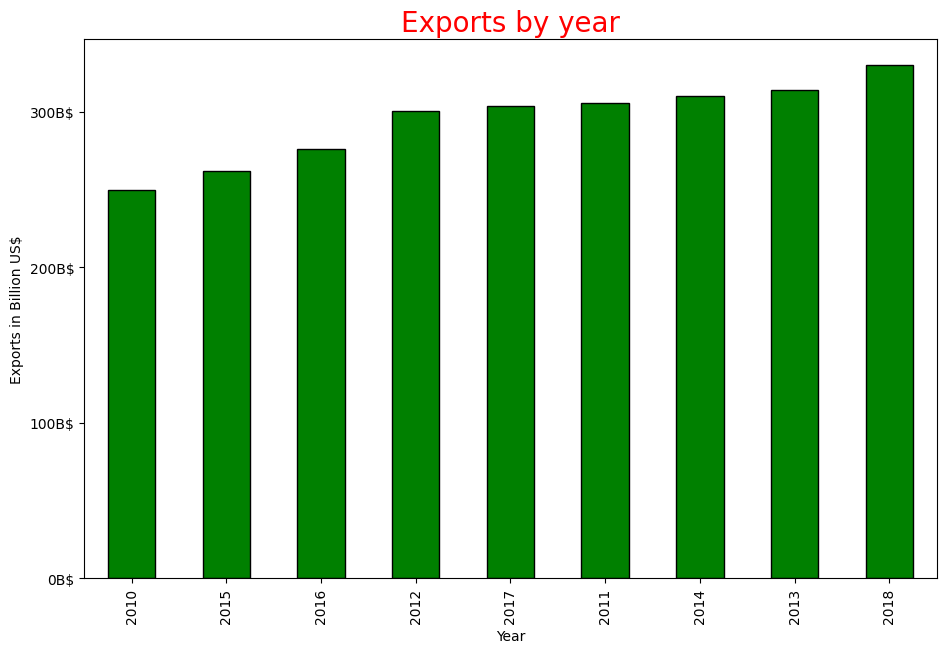

In [36]:
plt.figure(figsize=[11,7])
exp.groupby(by='year')['value'].sum().sort_values(ascending=True).plot.bar(color='green',edgecolor='Black')
plt.xlabel('Year')
plt.ylabel('Exports in Billion US$')
ticks = np.arange(0, 400000, 100000)
labels = ["{}B$".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.title('Exports by year',fontdict={'fontsize': 20,'color':'Red'})
plt.show()

 🌟  In 2018, India exported highest in value while in 2010
it was lowest

### 📈 Exports trend during 2010-2018 using line plot

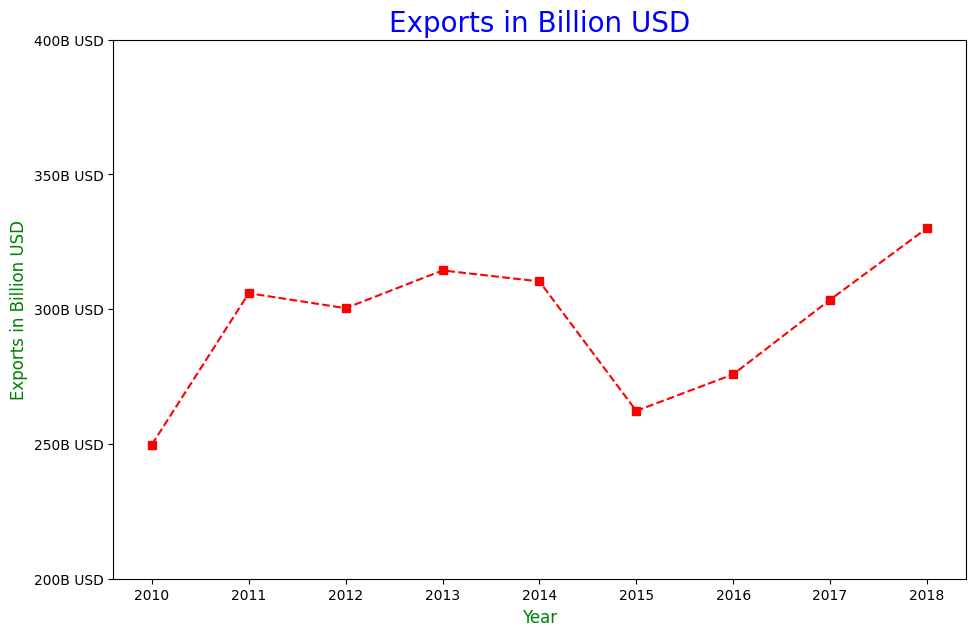

In [37]:
plt.figure(figsize=[11,7])
exp.groupby(by='year')['value'].sum().plot.line(color='red',marker='s',linestyle='--')
ticks = np.arange(200000, 450000, 50000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Year',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Exports in Billion USD',fontdict={'fontsize': 12,'color':'green'})
plt.title('Exports in Billion USD',fontdict={'fontsize': 20,'color':'Blue'})
plt.show()

🌟 India's export is continously increasing after 2015

### 📊 To which country India exported highest?

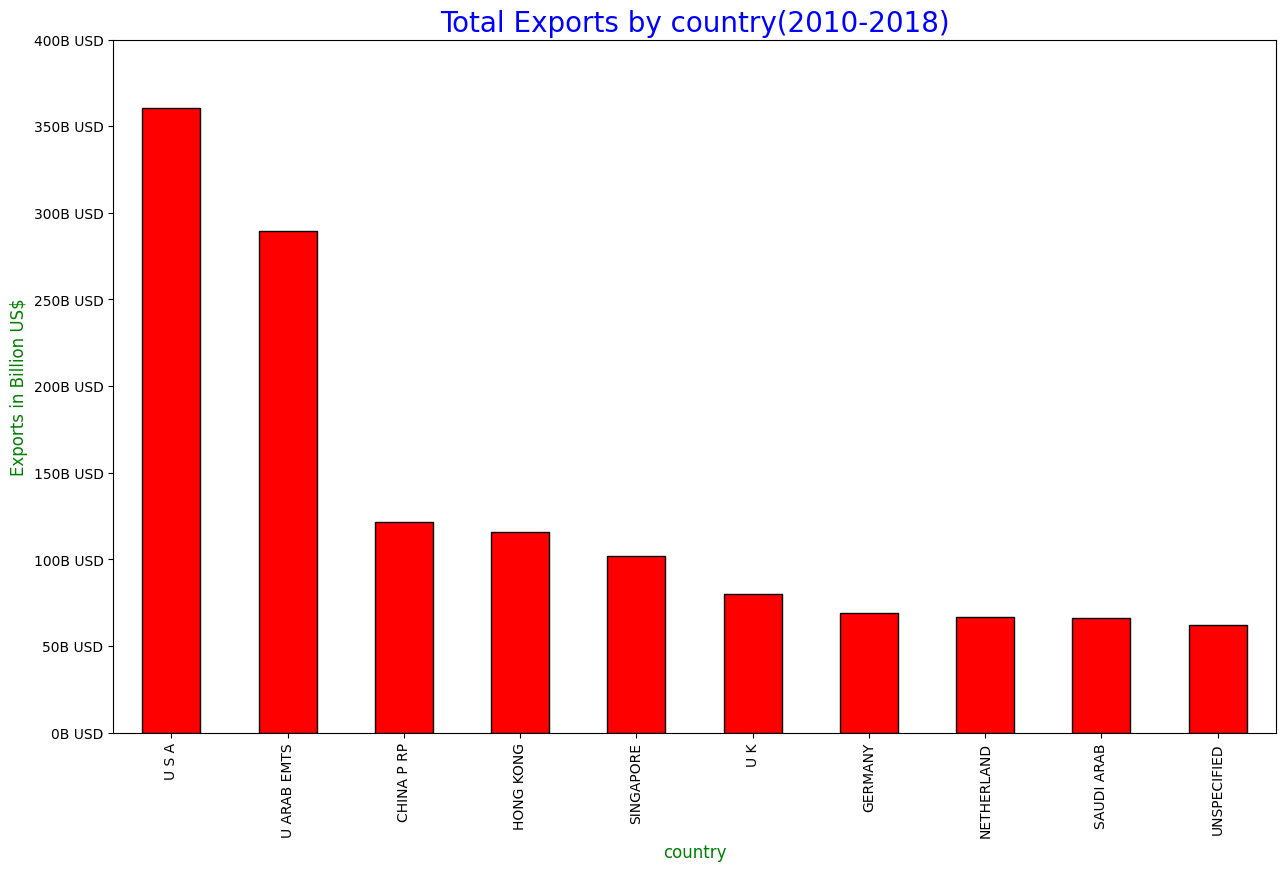

In [38]:
plt.figure(figsize=[15,9])
a=exp.groupby(by=['country'])['value'].sum().sort_values(ascending=False).head(10)
a.plot(kind='bar',color='red',edgecolor='black')
plt.xlabel('country',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Exports in Billion US$',fontdict={'fontsize': 12,'color':'green'})
plt.title('Total Exports by country(2010-2018)',fontdict={'fontsize': 20,'color':'Blue'})
ticks = np.arange(0, 450000, 50000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()


🌟 India exported highest(by value) to USA(2010-2018)

### 📊 Which Indian commodity was exported(highest in value)

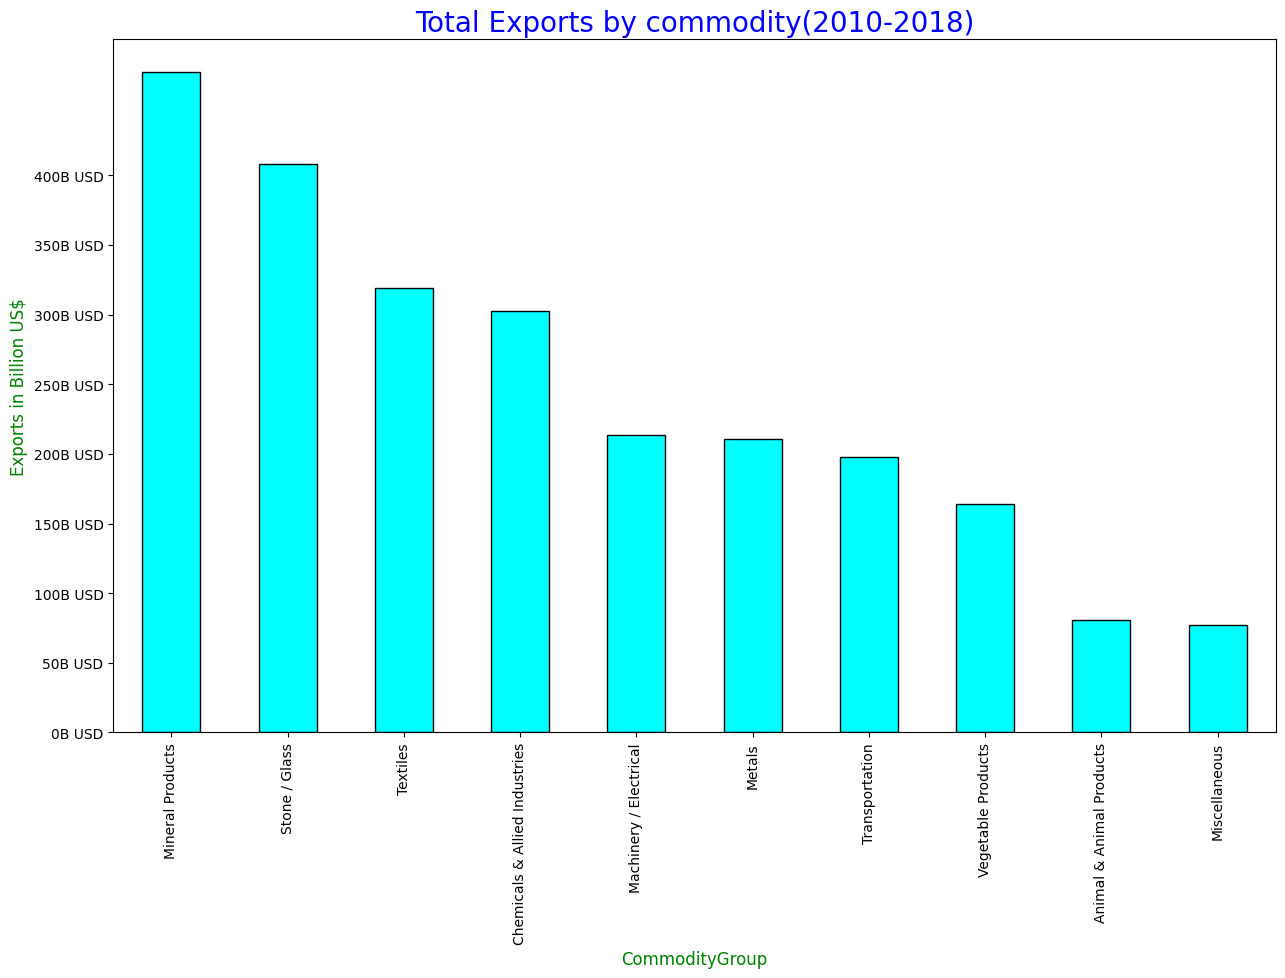

In [39]:
plt.figure(figsize=[15,9])
a=exp.groupby(by=['CommodityGroup'])['value'].sum().sort_values(ascending=False).head(10)
a.plot(kind='bar',color='cyan',edgecolor='black')
plt.xlabel('CommodityGroup',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Exports in Billion US$',fontdict={'fontsize': 12,'color':'green'})
plt.title('Total Exports by commodity(2010-2018)',fontdict={'fontsize': 20,'color':'Blue'})
ticks = np.arange(0, 450000, 50000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

🌟 Mineral products commodity was exported highest during 2010-2018

###🧮 The Matrix INDIAN export:

In [40]:
exp.head()

,HSCode,Commodity,value,country,year,CommodityGroup
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN,2018,Animal & Animal Products
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN,2018,Animal & Animal Products
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN,2018,Animal & Animal Products
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN,2018,Vegetable Products
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN,2018,Vegetable Products


📊 Visualizing Distributions with Histograms

* Plot histograms for all numerical columns

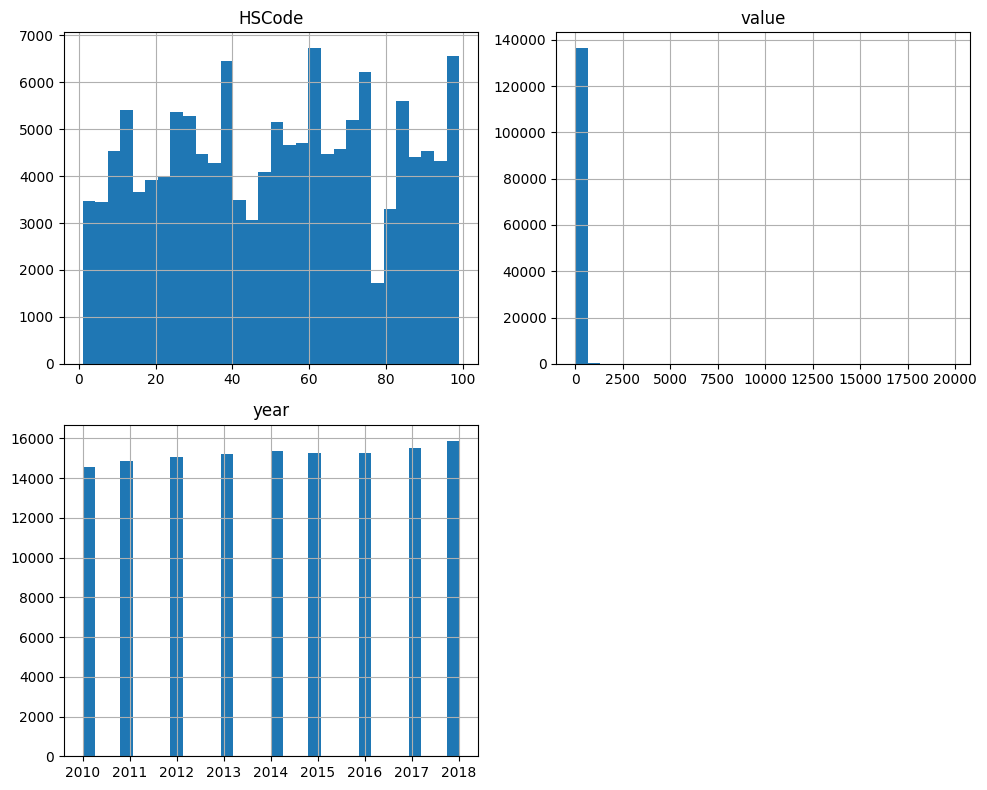

In [41]:
exp.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

* Plot box plots for numerical columns

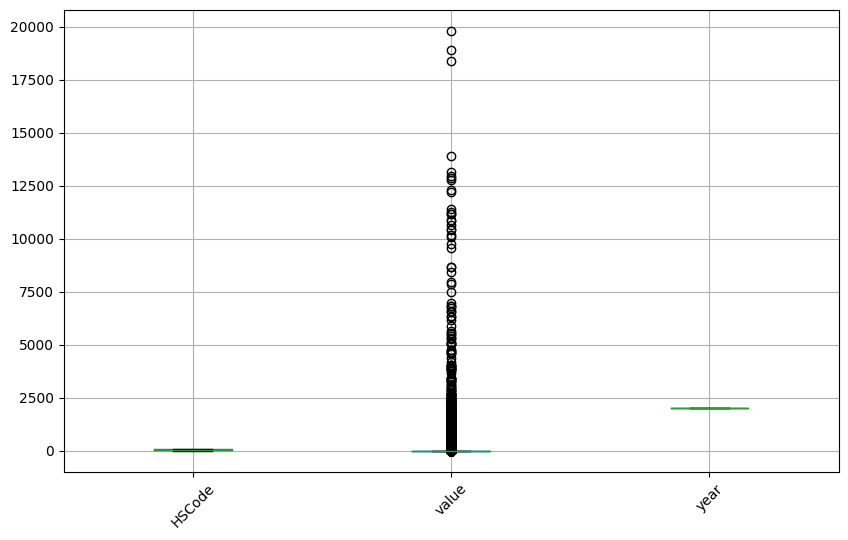

In [42]:
exp.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

🎯 Key insight:
 * HSCode: The histogram shows a varied distribution with some HSCode values having significantly higher frequencies (e.g., peaks around 20, 40, 60, and 80).
There are no extreme spikes or values that stand out as outliers beyond the general pattern.
 * YEAR: The histogram shows relatively consistent frequencies across years (2010–2018), with no extreme deviations.
 * Value: This histogram shows a highly skewed distribution with a large spike around 0-2500 and a few extreme values extending to 20,000.


### 🗃️ Handling outlier

* Calculate Q1 (25th percentile) and Q3 (75th percentile).
* Compute IQR = Q3 - Q1.
* Define outliers as values below Q1 - 1.5IQR or above Q3 + 1.5IQR.

In [43]:
Q1 = exp['value'].quantile(0.25)
Q3 = exp['value'].quantile(0.75)
IQR = Q3 - Q1
exp_no_outliers = exp[(exp['value'] >= Q1 - 1.5*IQR) & (exp['value'] <= Q3 + 1.5*IQR)]

In [44]:
exp_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113808 entries, 0 to 137022
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   HSCode          113808 non-null  int64  
 1   Commodity       113808 non-null  object 
 2   value           113808 non-null  float64
 3   country         113808 non-null  object 
 4   year            113808 non-null  int64  
 5   CommodityGroup  113808 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.1+ MB


📊 Result:

* Initial dataset: 117,023 rows

* After outlier removal: 113,808 rows

* 3,215 rows were dropped due to extreme values.

✨ Convert Categorical data to Numeric:

In [45]:
exp1 = exp_no_outliers.drop(['HSCode', 'Commodity', 'country'], axis=1)

In [46]:
exp1.head()

,value,year,CommodityGroup
0,0.18,2018,Animal & Animal Products
1,0.00,2018,Animal & Animal Products
3,0.00,2018,Vegetable Products
4,1.89,2018,Vegetable Products
7,0.75,2018,Vegetable Products


In [47]:
exp1 = pd.get_dummies(exp1, columns=['CommodityGroup'])

In [48]:
exp1.head()

,value,year,CommodityGroup_Animal & Animal Products,CommodityGroup_Chemicals & Allied Industries,CommodityGroup_Foodstuffs,CommodityGroup_Footwear / Headgear,CommodityGroup_Machinery / Electrical,CommodityGroup_Metals,CommodityGroup_Mineral Products,CommodityGroup_Miscellaneous,CommodityGroup_Plastics / Rubbers,"CommodityGroup_Raw Hides, Skins, Leather, & Furs",CommodityGroup_Stone / Glass,CommodityGroup_Textiles,CommodityGroup_Transportation,CommodityGroup_Vegetable Products,CommodityGroup_Wood & Wood Products
0,0.18,2018,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.00,2018,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.00,2018,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,1.89,2018,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,0.75,2018,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


🧾 Converting the boolean into binary values

In [49]:
exclued_columns = ['value', 'year']
exp1 = exp1.apply(lambda x: x.astype(int) if x.name not in exclued_columns else x)

In [50]:
exp1.head()

,value,year,CommodityGroup_Animal & Animal Products,CommodityGroup_Chemicals & Allied Industries,CommodityGroup_Foodstuffs,CommodityGroup_Footwear / Headgear,CommodityGroup_Machinery / Electrical,CommodityGroup_Metals,CommodityGroup_Mineral Products,CommodityGroup_Miscellaneous,CommodityGroup_Plastics / Rubbers,"CommodityGroup_Raw Hides, Skins, Leather, & Furs",CommodityGroup_Stone / Glass,CommodityGroup_Textiles,CommodityGroup_Transportation,CommodityGroup_Vegetable Products,CommodityGroup_Wood & Wood Products
0,0.18,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.00,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.00,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.89,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0.75,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


* To visualize the strength and direction of relationships between numerical variables using a correlation and heatmap.

In [51]:
correlation_matrix = exp1.corr()
correlation_matrix

,value,year,CommodityGroup_Animal & Animal Products,CommodityGroup_Chemicals & Allied Industries,CommodityGroup_Foodstuffs,CommodityGroup_Footwear / Headgear,CommodityGroup_Machinery / Electrical,CommodityGroup_Metals,CommodityGroup_Mineral Products,CommodityGroup_Miscellaneous,CommodityGroup_Plastics / Rubbers,"CommodityGroup_Raw Hides, Skins, Leather, & Furs",CommodityGroup_Stone / Glass,CommodityGroup_Textiles,CommodityGroup_Transportation,CommodityGroup_Vegetable Products,CommodityGroup_Wood & Wood Products
value,1.000000,0.001831,-0.010078,0.024497,0.008534,-0.060412,0.068639,0.016317,-0.002282,-0.062378,0.072985,-0.022207,0.027151,0.031199,-0.000639,-0.012883,-0.039101
year,0.001831,1.000000,-0.010720,-0.004379,0.010816,0.007826,-0.002680,0.001422,0.000661,-0.005203,-0.004276,0.005733,-0.004703,-0.000792,-0.003499,0.005658,-0.000120
CommodityGroup_Animal & Animal Products,-0.010078,-0.010720,1.000000,-0.065094,-0.056410,-0.039689,-0.025040,-0.062010,-0.030499,-0.068653,-0.026342,-0.030099,-0.042320,-0.077047,-0.030099,-0.060745,-0.045082
CommodityGroup_Chemicals & Allied Industries,0.024497,-0.004379,-0.065094,1.000000,-0.112443,-0.079112,-0.049913,-0.123605,-0.060795,-0.136847,-0.052509,-0.059997,-0.084356,-0.153580,-0.059997,-0.121084,-0.089863
CommodityGroup_Foodstuffs,0.008534,0.010816,-0.056410,-0.112443,1.000000,-0.068558,-0.043254,-0.107115,-0.052684,-0.118590,-0.045503,-0.051992,-0.073102,-0.133091,-0.051992,-0.104930,-0.077874
CommodityGroup_Footwear / Headgear,-0.060412,0.007826,-0.039689,-0.079112,-0.068558,1.000000,-0.030433,-0.075364,-0.037067,-0.083437,-0.032015,-0.036581,-0.051433,-0.093640,-0.036581,-0.073826,-0.054791
CommodityGroup_Machinery / Electrical,0.068639,-0.002680,-0.025040,-0.049913,-0.043254,-0.030433,1.000000,-0.047548,-0.023386,-0.052642,-0.020199,-0.023079,-0.032450,-0.059079,-0.023079,-0.046578,-0.034568
CommodityGroup_Metals,0.016317,0.001422,-0.062010,-0.123605,-0.107115,-0.075364,-0.047548,1.000000,-0.057914,-0.130362,-0.050020,-0.057154,-0.080359,-0.146303,-0.057154,-0.115346,-0.085605
CommodityGroup_Mineral Products,-0.002282,0.000661,-0.030499,-0.060795,-0.052684,-0.037067,-0.023386,-0.057914,1.000000,-0.064118,-0.024602,-0.028111,-0.039524,-0.071958,-0.028111,-0.056732,-0.042104
CommodityGroup_Miscellaneous,-0.062378,-0.005203,-0.068653,-0.136847,-0.118590,-0.083437,-0.052642,-0.130362,-0.064118,1.000000,-0.055379,-0.063276,-0.088968,-0.161976,-0.063276,-0.127703,-0.094776


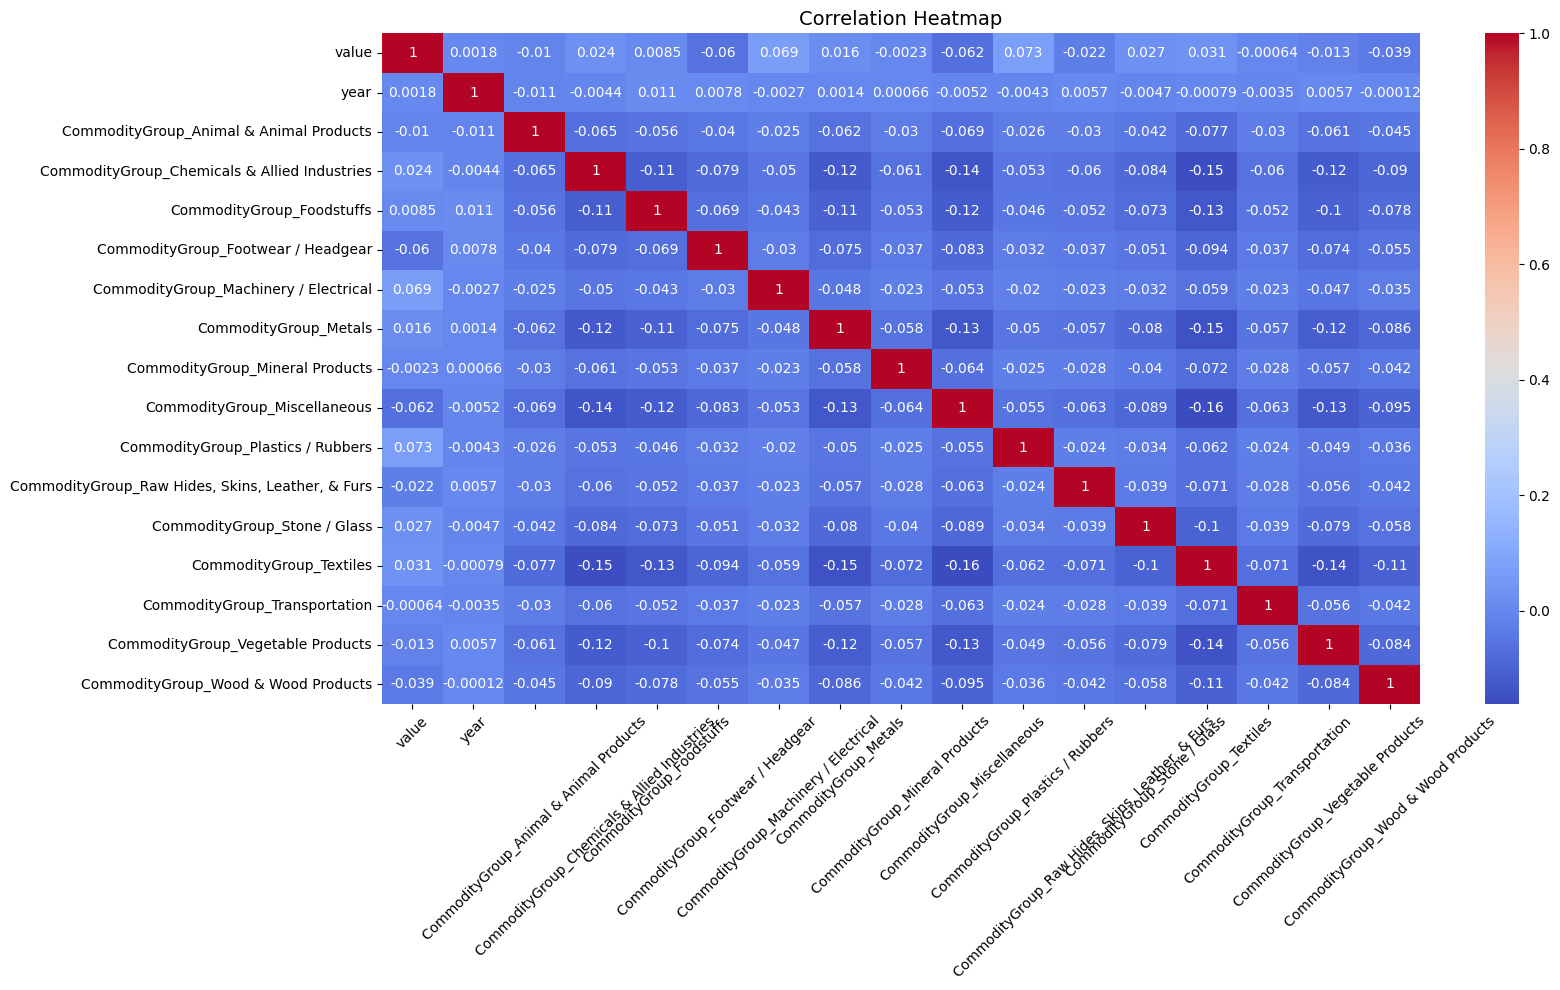

In [52]:
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 🎯 **Key insight:**
 * Most other CommodityGroup categories have very weak or negligible correlations with value (close to 0), indicating little linear relationship.
There are no extreme spikes or values that stand out as outliers beyond the general pattern.
 * YEAR:
 CommodityGroup_Textiles shows a moderate positive correlation with year (0.16), suggesting a trend of increasing presence or value over time.
 CommodityGroup_Transportation (0.14) and
 CommodityGroup_Vegetable Products (0.11) also have weak positive correlations with year.
 Negative correlations are minimal, with CommodityGroup_Wood & Wood Products showing a weak negative correlation (-0.14).
#### ✅ **Conclusion:**
* The correlations between value and year are very weak (0.0018 and 0.0054, respectively), indicating that neither variable strongly predicts the other over time.
* The majority of correlations between CommodityGroup categories and value or year are close to zero, suggesting that the dataset may not exhibit strong linear relationships across these variables.

### 2.3 Visualization for INDIAN import:

### 📊 In Which year India imported highest in value

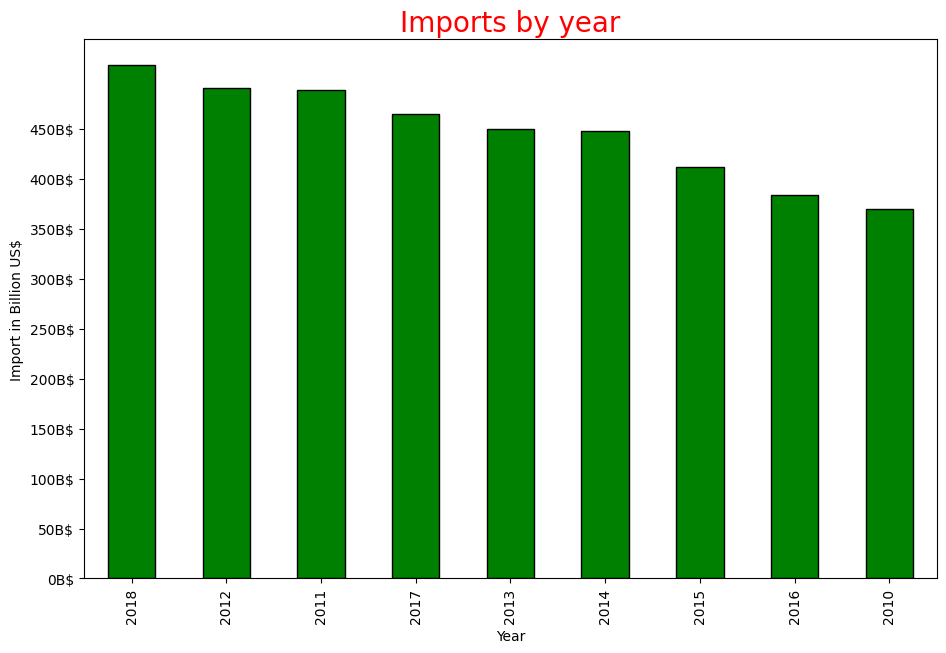

In [53]:
plt.figure(figsize=[11,7])
imp.groupby(by='year')['value'].sum().sort_values(ascending=False).plot.bar(color='green',edgecolor='Black')
plt.xlabel('Year')
plt.ylabel('Import in Billion US$')
ticks = np.arange(0, 500000, 50000)
labels = ["{}B$".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.title('Imports by year',fontdict={'fontsize': 20,'color':'Red'})
plt.show()

 🌟  In 2018, India imported highest in value while in 2010
it was lowest

### 📈 Imports trend during 2010-2018 using line plot

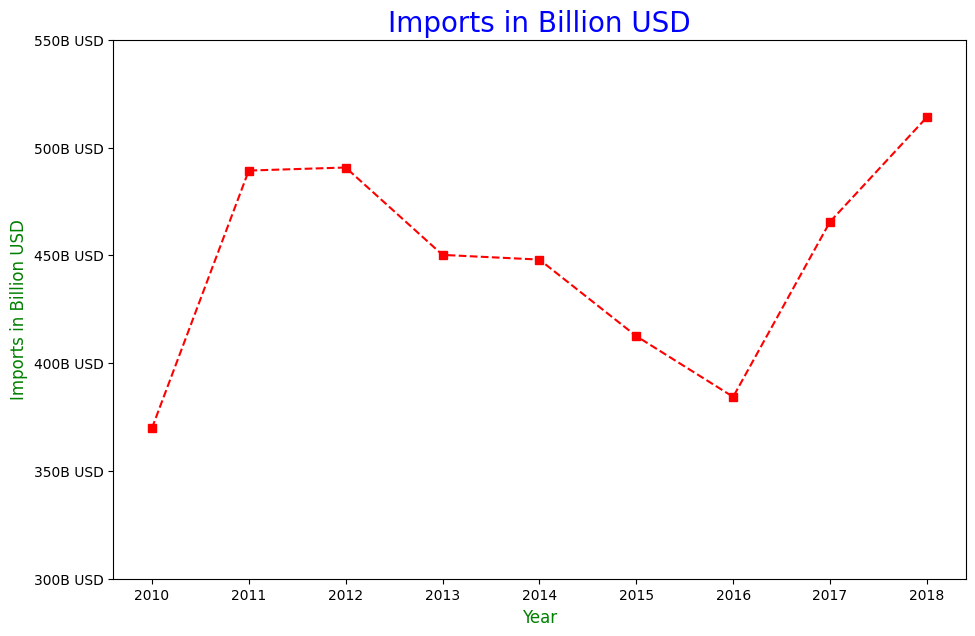

In [54]:
plt.figure(figsize=[11,7])
imp.groupby(by='year')['value'].sum().plot.line(color='red',marker='s',linestyle='--')
ticks = np.arange(300000, 600000, 50000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Year',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Imports in Billion USD',fontdict={'fontsize': 12,'color':'green'})
plt.title('Imports in Billion USD',fontdict={'fontsize': 20,'color':'Blue'})
plt.show()

🌟 India's import is continously increasing after 2015

### 📊 To which country India imported highest?

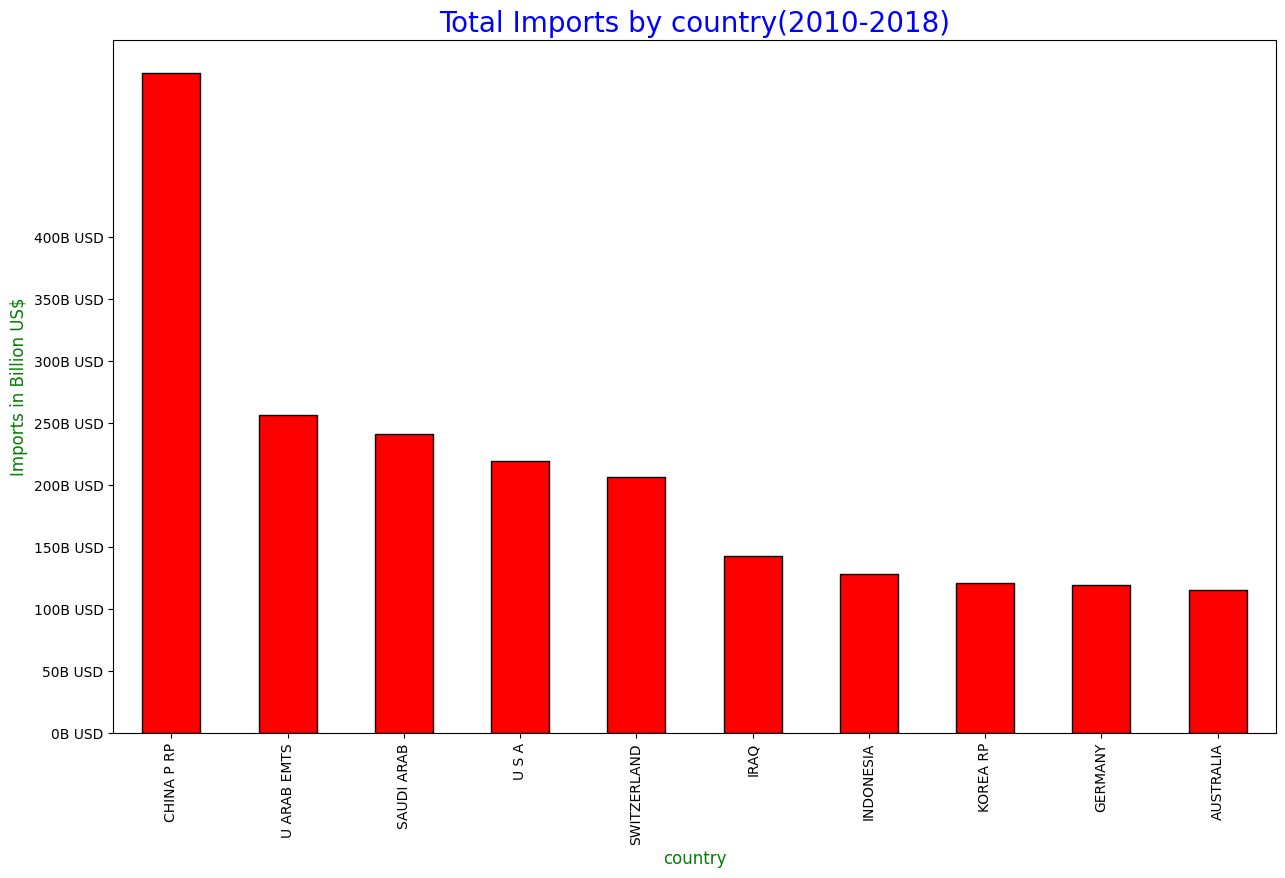

In [55]:
plt.figure(figsize=[15,9])
a=imp.groupby(by=['country'])['value'].sum().sort_values(ascending=False).head(10)
a.plot(kind='bar',color='red',edgecolor='black')
plt.xlabel('country',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Imports in Billion US$',fontdict={'fontsize': 12,'color':'green'})
plt.title('Total Imports by country(2010-2018)',fontdict={'fontsize': 20,'color':'Blue'})
ticks = np.arange(0, 450000, 50000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

🌟 India imported highest(by value) to CHINA (2010-2018)

### 📊 Which Indian commodity was imported(highest in value)

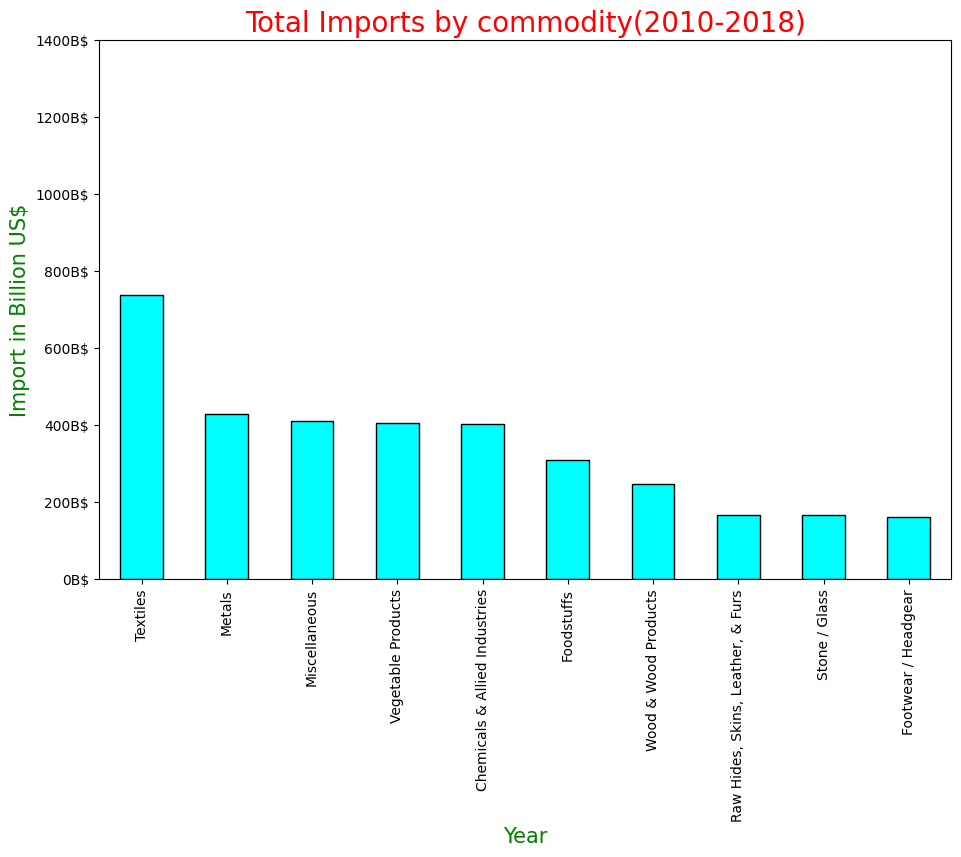

In [56]:
plt.figure(figsize=[11,7])
imp_by_com=imp.groupby(by=['CommodityGroup'])['value'].sum().sort_values(ascending=False).head(10)
imp_by_com.plot(kind='bar',color='cyan',edgecolor='black')
plt.xlabel('Year',fontdict={'fontsize': 15,'color':'green'})
plt.ylabel('Import in Billion US$',fontdict={'fontsize': 15,'color':'green'})
ticks = np.arange(0, 1600000, 200000)
labels = ["{}B$".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.title('Total Imports by commodity(2010-2018)',fontdict={'fontsize': 20,'color':'Red'})
plt.show()

🌟 Textiles commodity was exported highest during 2010-2018

### 🧮 The Matrix INDIAN import:

In [57]:
imp.head()

,HSCode,Commodity,value,country,year,CommodityGroup
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN,2018,Animal & Animal Products
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN,2018,Animal & Animal Products
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN,2018,Animal & Animal Products
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN,2018,Vegetable Products
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,0.00,AFGHANISTAN,2018,Vegetable Products


📊 Visualizing Distributions with Histograms

* Plot histograms for all numerical columns

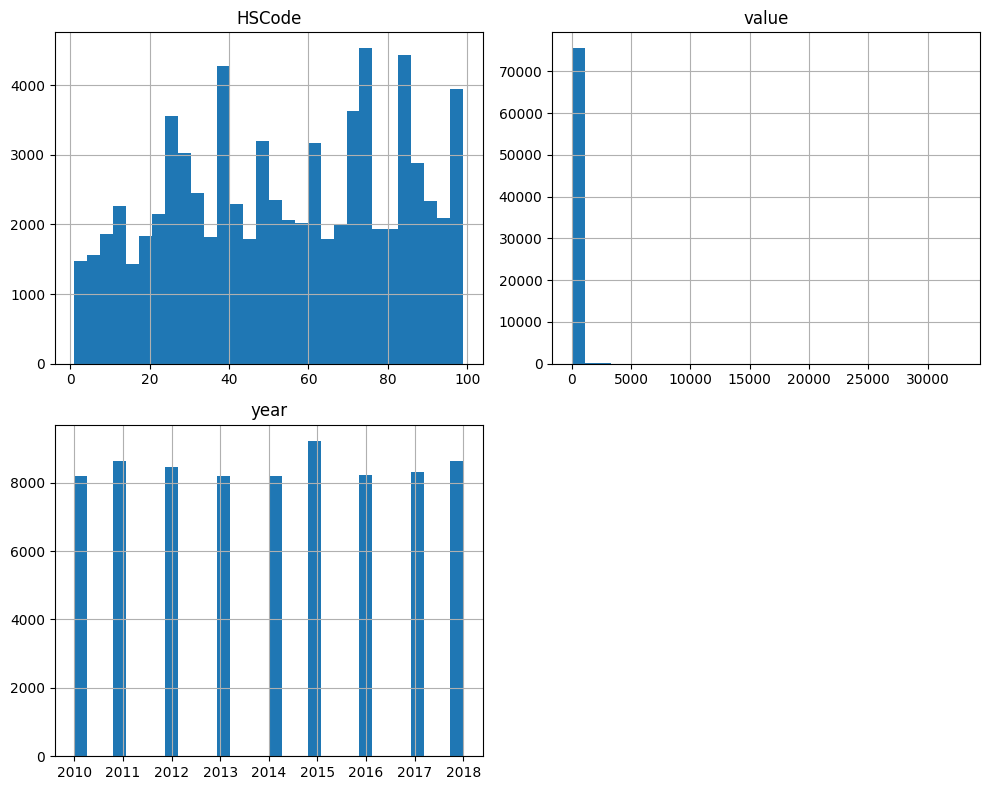

In [58]:
imp.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

* Plot box plots for numerical columns

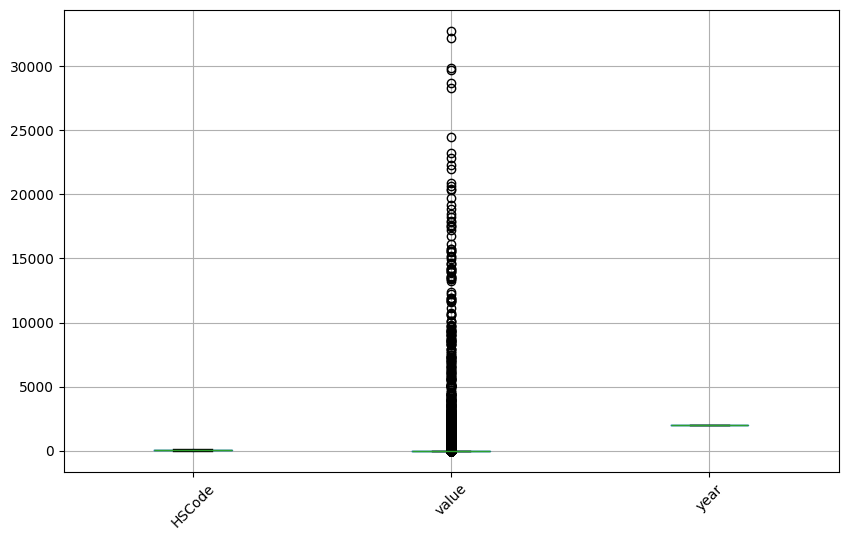

In [59]:
imp.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

🎯 Key insight:
 * HSCode: The histogram shows a varied distribution with some HSCode values having significantly higher frequencies (e.g., peaks around 40, 70, and 90).
There are no extreme spikes or values that stand out as outliers beyond the general pattern.
 * YEAR: The histogram shows relatively consistent frequencies across years (2010–2018), with no extreme deviations.
 * Value: The most notable feature is the presence of numerous outliers in the value column, which dominate the upper range of the plot. This skewness suggests that the majority of values are low, with a few exceptionally high values.

### 🗃️ Handling outlier

* Calculate Q1 (25th percentile) and Q3 (75th percentile).
* Compute IQR = Q3 - Q1.
* Define outliers as values below Q1 - 1.5IQR or above Q3 + 1.5IQR.

In [60]:
Q1 = imp['value'].quantile(0.25)
Q3 = imp['value'].quantile(0.75)
IQR = Q3 - Q1

In [61]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [62]:
imp_no_outliers = imp[(imp['value'] >= lower_bound) & (imp['value'] <= upper_bound)]

In [63]:
imp_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62221 entries, 0 to 76123
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HSCode          62221 non-null  int64  
 1   Commodity       62221 non-null  object 
 2   value           62221 non-null  float64
 3   country         62221 non-null  object 
 4   year            62221 non-null  int64  
 5   CommodityGroup  62221 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.3+ MB


📊 Result:

* Initial dataset: 76,124 rows

* After outlier removal: 62,221 rows

* 13,903 rows were dropped due to extreme values.

✨ Convert Categorical data to Numeric:

In [64]:
imp1 = imp_no_outliers.drop(['HSCode', 'Commodity', 'country'], axis=1)

In [65]:
imp1.head()

,value,year,CommodityGroup
0,0.00,2018,Animal & Animal Products
4,0.00,2018,Vegetable Products
7,0.65,2018,Vegetable Products
8,0.05,2018,Vegetable Products
9,0.00,2018,Vegetable Products


In [66]:
imp1 = pd.get_dummies(imp1, columns=['CommodityGroup'])

In [67]:
imp1.head()

,value,year,CommodityGroup_Animal & Animal Products,CommodityGroup_Chemicals & Allied Industries,CommodityGroup_Foodstuffs,CommodityGroup_Footwear / Headgear,CommodityGroup_Machinery / Electrical,CommodityGroup_Metals,CommodityGroup_Mineral Products,CommodityGroup_Miscellaneous,CommodityGroup_Plastics / Rubbers,"CommodityGroup_Raw Hides, Skins, Leather, & Furs",CommodityGroup_Stone / Glass,CommodityGroup_Textiles,CommodityGroup_Transportation,CommodityGroup_Vegetable Products,CommodityGroup_Wood & Wood Products
0,0.00,2018,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.00,2018,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,0.65,2018,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
8,0.05,2018,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9,0.00,2018,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


🧾 Converting the boolean into binary values

In [68]:
exclued_columns = ['value', 'year']
imp1 = imp1.apply(lambda x: x.astype(int) if x.name not in exclued_columns else x)

In [69]:
imp1.head()

,value,year,CommodityGroup_Animal & Animal Products,CommodityGroup_Chemicals & Allied Industries,CommodityGroup_Foodstuffs,CommodityGroup_Footwear / Headgear,CommodityGroup_Machinery / Electrical,CommodityGroup_Metals,CommodityGroup_Mineral Products,CommodityGroup_Miscellaneous,CommodityGroup_Plastics / Rubbers,"CommodityGroup_Raw Hides, Skins, Leather, & Furs",CommodityGroup_Stone / Glass,CommodityGroup_Textiles,CommodityGroup_Transportation,CommodityGroup_Vegetable Products,CommodityGroup_Wood & Wood Products
0,0.00,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.00,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0.65,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0.05,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0.00,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [70]:
correlation_matrix = imp1.corr()
correlation_matrix

,value,year,CommodityGroup_Animal & Animal Products,CommodityGroup_Chemicals & Allied Industries,CommodityGroup_Foodstuffs,CommodityGroup_Footwear / Headgear,CommodityGroup_Machinery / Electrical,CommodityGroup_Metals,CommodityGroup_Mineral Products,CommodityGroup_Miscellaneous,CommodityGroup_Plastics / Rubbers,"CommodityGroup_Raw Hides, Skins, Leather, & Furs",CommodityGroup_Stone / Glass,CommodityGroup_Textiles,CommodityGroup_Transportation,CommodityGroup_Vegetable Products,CommodityGroup_Wood & Wood Products
value,1.000000,0.012132,-0.004282,-0.008270,-0.002104,-0.006771,-0.001423,0.005205,-0.000475,0.006147,-0.001112,0.001401,0.000991,0.001712,0.002152,0.000760,0.003117
year,0.012132,1.000000,-0.003778,-0.003741,0.004800,-0.002808,-0.001990,0.003845,-0.002062,-0.004069,0.001749,0.005629,-0.003727,-0.001054,-0.002503,0.001971,0.007928
CommodityGroup_Animal & Animal Products,-0.004282,-0.003778,1.000000,-0.065993,-0.054070,-0.037248,-0.030166,-0.060978,-0.030924,-0.062462,-0.029001,-0.028606,-0.041105,-0.075708,-0.032194,-0.059494,-0.041179
CommodityGroup_Chemicals & Allied Industries,-0.008270,-0.003741,-0.065993,1.000000,-0.114276,-0.078722,-0.063756,-0.128876,-0.065358,-0.132013,-0.061293,-0.060459,-0.086874,-0.160007,-0.068042,-0.125739,-0.087031
CommodityGroup_Foodstuffs,-0.002104,0.004800,-0.054070,-0.114276,1.000000,-0.064500,-0.052237,-0.105592,-0.053550,-0.108163,-0.050219,-0.049536,-0.071179,-0.131099,-0.055749,-0.103022,-0.071308
CommodityGroup_Footwear / Headgear,-0.006771,-0.002808,-0.037248,-0.078722,-0.064500,1.000000,-0.035985,-0.072740,-0.036889,-0.074510,-0.034595,-0.034124,-0.049033,-0.090311,-0.038404,-0.070969,-0.049122
CommodityGroup_Machinery / Electrical,-0.001423,-0.001990,-0.030166,-0.063756,-0.052237,-0.035985,1.000000,-0.058911,-0.029876,-0.060345,-0.028018,-0.027637,-0.039711,-0.073141,-0.031103,-0.057477,-0.039783
CommodityGroup_Metals,0.005205,0.003845,-0.060978,-0.128876,-0.105592,-0.072740,-0.058911,1.000000,-0.060391,-0.121981,-0.056635,-0.055864,-0.080272,-0.147848,-0.062871,-0.116184,-0.080418
CommodityGroup_Mineral Products,-0.000475,-0.002062,-0.030924,-0.065358,-0.053550,-0.036889,-0.029876,-0.060391,1.000000,-0.061861,-0.028722,-0.028331,-0.040709,-0.074979,-0.031884,-0.058921,-0.040783
CommodityGroup_Miscellaneous,0.006147,-0.004069,-0.062462,-0.132013,-0.108163,-0.074510,-0.060345,-0.121981,-0.061861,1.000000,-0.058014,-0.057224,-0.082226,-0.151446,-0.064402,-0.119012,-0.082375


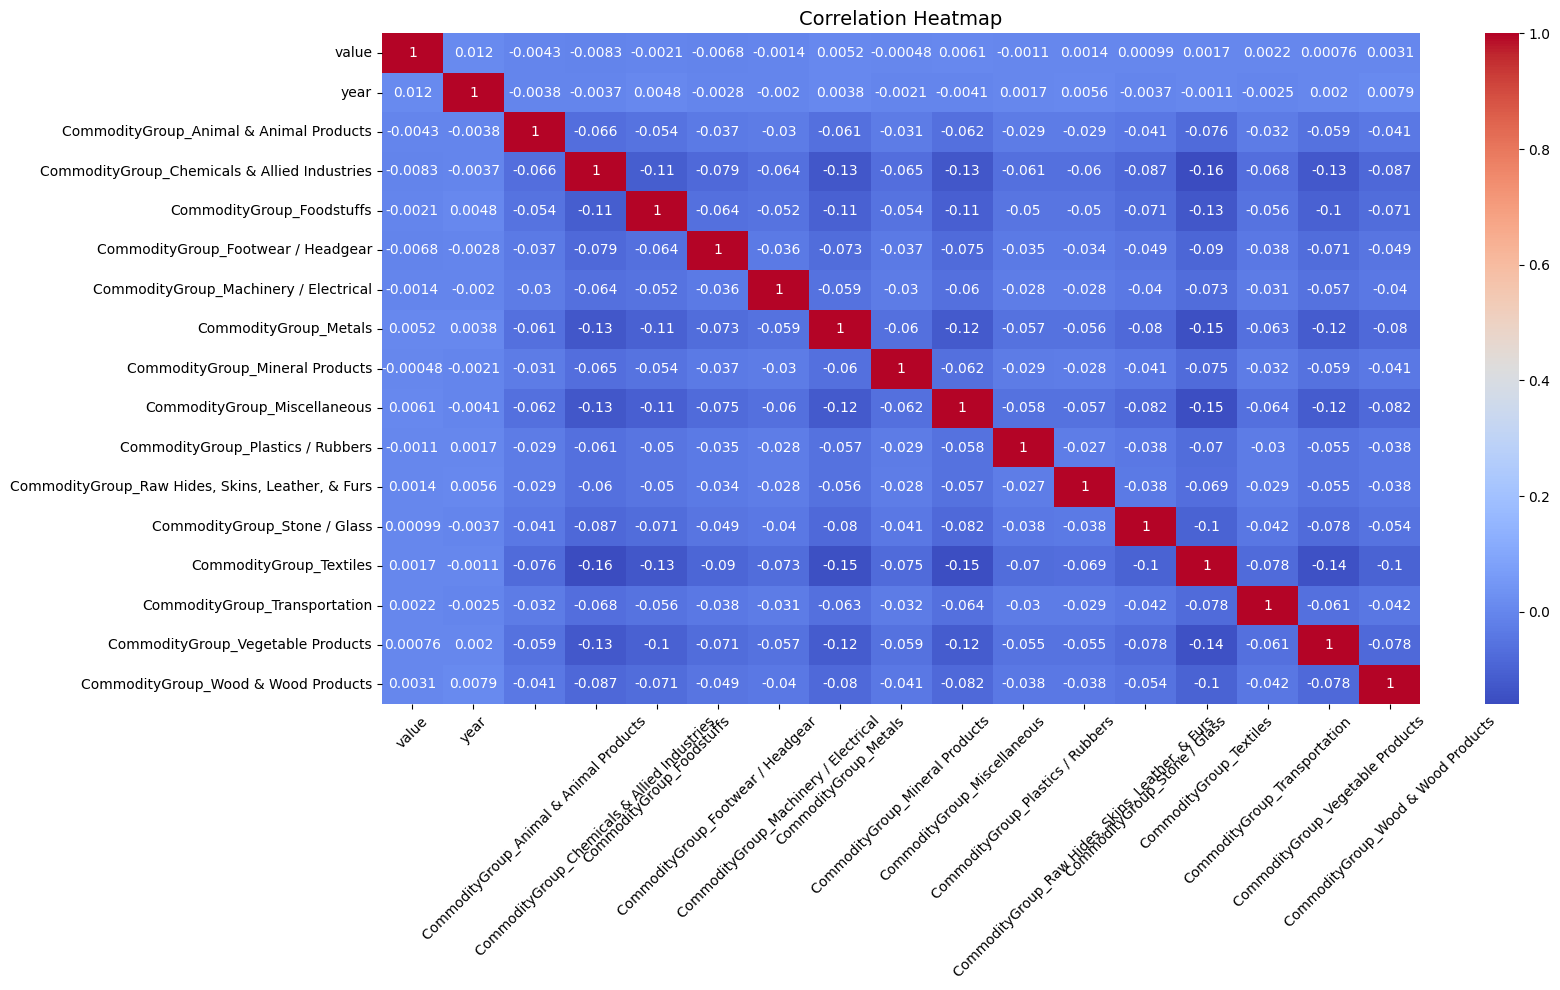

In [71]:
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 🎯 **Key insight:**
1. Correlation with value:
CommodityGroup_Animal & Animal Products shows a moderate positive correlation with value (0.12), suggesting a slight tendency for higher values in this category.
* CommodityGroup_Chemicals & Allied Industries (0.11) and CommodityGroup_Footwear, Headgear (0.11) also exhibit weak positive correlations with value.
* Most other CommodityGroup categories have very weak correlations with value (close to 0), indicating little linear relationship.
2. Correlation with year:
* CommodityGroup_Textiles has a moderate positive correlation with year (0.16), implying a trend of increasing presence or value over time.
* CommodityGroup_Transportation (0.14) and CommodityGroup_Vegetable Products (0.11) show weak positive correlations with year.
* Negative correlations are minimal, with CommodityGroup_Wood & Wood Products showing a weak negative correlation (-0.14).
3. Inter-Group Correlations:
* Strong positive correlations exist within certain CommodityGroup pairs, such as:
CommodityGroup_Animal & Animal Products vs CommodityGroup_Chemicals & Allied Industries (0.66).
CommodityGroup_Machinery/ Electrical vs CommodityGroup_Mineral Products (0.71).
CommodityGroup_Plastics & Rubbers vs CommodityGroup_Miscellaneous (0.65).
* These high correlations suggest that these groups may share similar trends or dependencies.
* Negative correlations are rare and weak, with no significant inverse relationships standing out.
#### ✅ **Conclusion:**
* The correlation between value and year is very weak (0.0012), indicating that value does not strongly vary with time.
* The majority of correlations between CommodityGroup categories and value or year are close to zero, suggesting that linear relationships are not dominant across these variables.

# 3 India's trade balance

## 📊 Compare Import Vs. Export during 2010-2018

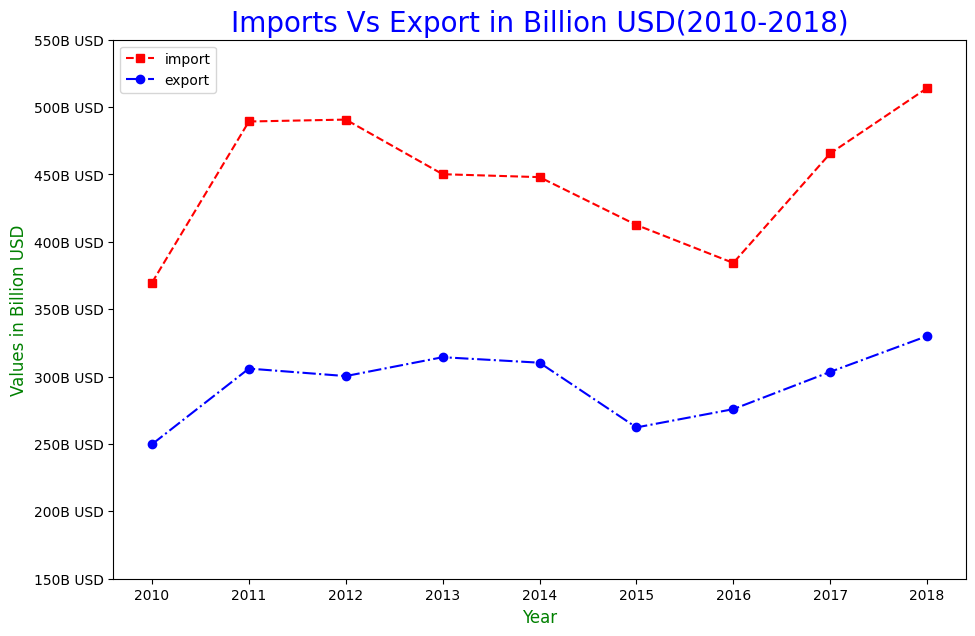

In [72]:
plt.figure(figsize=[11,7])
imp.groupby(by='year')['value'].sum().plot.line(color='red',marker='s',linestyle='--',label='import')
exp.groupby(by='year')['value'].sum().plot.line(color='blue',marker='o',linestyle='-.',label='export')
ticks = np.arange(150000, 600000, 50000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Year',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Values in Billion USD',fontdict={'fontsize': 12,'color':'green'})
plt.title('Imports Vs Export in Billion USD(2010-2018)',fontdict={'fontsize': 20,'color':'Blue'})
plt.legend()
plt.show()

🌟 Exports increases/decreases import also increase/decreases or vice-versa.

Create a new data base show export's value and Import's value of India.

- Grouping countries for export data

In [73]:
df1=exp.groupby(by='country')['value'].sum()
df1.head()

,value
country,
AFGHANISTAN,4760.19
ALBANIA,196.51
ALGERIA,8232.24
AMERI SAMOA,3.40
ANDORRA,6.28


- Grouping countries for import data

In [74]:
df2=imp.groupby(by='country')['value'].sum()
df2.head()

,value
country,
AFGHANISTAN,2686.62
ALBANIA,524.18
ALGERIA,10185.73
AMERI SAMOA,5.82
ANDORRA,5.45


- Merging data frame on country

In [75]:
df3=pd.merge(df1,df2,on='country')
df3.head()

,value_x,value_y
country,,
AFGHANISTAN,4760.19,2686.62
ALBANIA,196.51,524.18
ALGERIA,8232.24,10185.73
AMERI SAMOA,3.40,5.82
ANDORRA,6.28,5.45


In [76]:
df3.rename(columns={'value_x':'export_val','value_y':'import_val'},inplace=True)

In [77]:
df3.head()

,export_val,import_val
country,,
AFGHANISTAN,4760.19,2686.62
ALBANIA,196.51,524.18
ALGERIA,8232.24,10185.73
AMERI SAMOA,3.40,5.82
ANDORRA,6.28,5.45


- Finding correlation between exoprt and import value

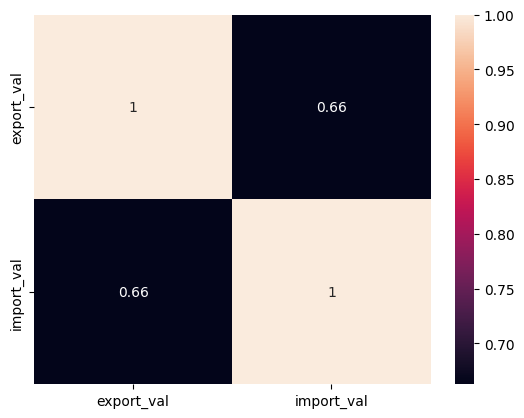

In [78]:
value_corr=df3.corr()
sns.heatmap(value_corr,annot=True)
plt.show()

🌟 Export_val and import_val are moderately positive correlated

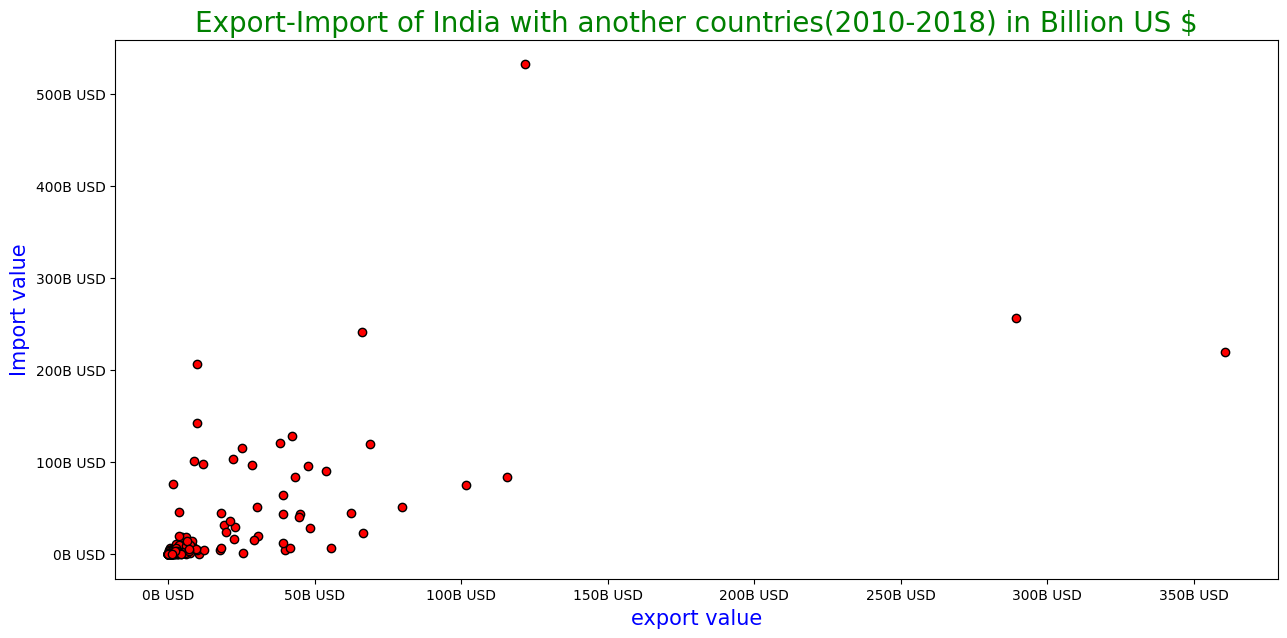

In [79]:
plt.figure(figsize=[15,7])
plt.scatter(df3.export_val,df3.import_val,marker='o',edgecolor='black',color='red')
plt.ylabel('Import value',fontdict={'fontsize':15,'color':'blue'})
plt.xlabel('export value',fontdict={'fontsize':15,'color':'blue'})
ticks_y = np.arange(0, 600000, 100000)
ticks_x = np.arange(0, 400000, 50000)
labels_y = ["{}B USD".format(i//1000) for i in ticks_y]
labels_x = ["{}B USD".format(i//1000) for i in ticks_x]
plt.yticks(ticks_y, labels_y)
plt.xticks(ticks_x, labels_x)
plt.title('Export-Import of India with another countries(2010-2018) in Billion US $',fontdict={'fontsize':20,'color':'green'})
plt.show()

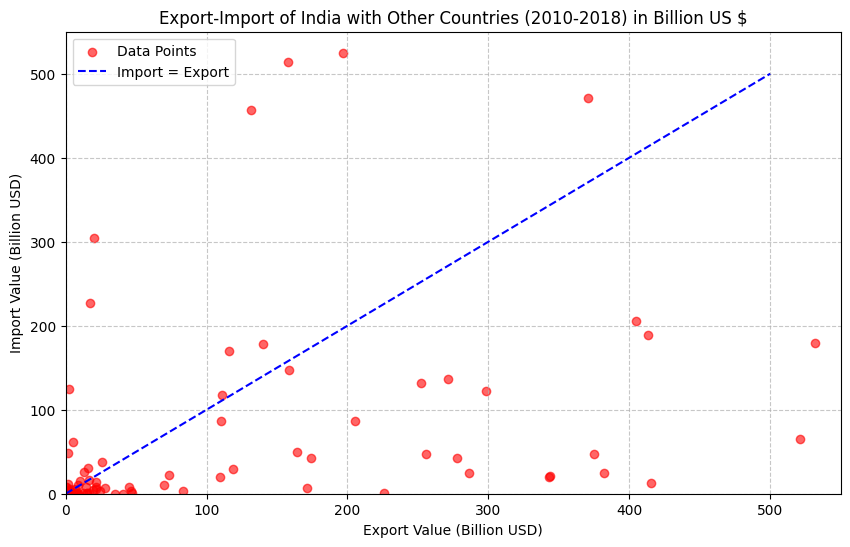

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df3['export_val'], df3['import_val'], color='red', alpha=0.6, label='Data Points')
plt.plot([0, 500], [0, 500], color='blue', linestyle='--', label='Import = Export')
plt.title('Export-Import of India with Other Countries (2010-2018) in Billion US $')
plt.xlabel('Export Value (Billion USD)')
plt.ylabel('Import Value (Billion USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(0, 550)
plt.ylim(0, 550)
plt.show()

### ✅ Conclusion:
* The plot contains a dense cluster of points with import value and export value both ranging from 0 to approximately 200-300 billion USD, indicating a large number of data points with moderate trade values. There are a few outliers with higher values, such as one point near 500 billion USD for both import and export, and a few others around 300-400 billion USD.
* Trend: The majority of points lie along a diagonal trend where import value and export value are roughly equal, suggesting a balanced trade relationship for most countries. The outliers deviate significantly from this trend.
* Outliers: The presence of a few high-value points (e.g., 500 billion USD) indicates potential extreme trade relationships that may skew the overall analysis.

- Making a column for trade difference to find out with which country India a been net exoprter and with a net importer?

In [81]:
df3['trade_diff']=df3['export_val']-df3['import_val']
df3.head()

,export_val,import_val,trade_diff
country,,,
AFGHANISTAN,4760.19,2686.62,2073.57
ALBANIA,196.51,524.18,-327.67
ALGERIA,8232.24,10185.73,-1953.49
AMERI SAMOA,3.40,5.82,-2.42
ANDORRA,6.28,5.45,0.83


In [82]:
df3['NE/NI']=df3['trade_diff'].apply(lambda x: 'NE' if x>0 else 'NI')

In [83]:
df3.head()

,export_val,import_val,trade_diff,NE/NI
country,,,,
AFGHANISTAN,4760.19,2686.62,2073.57,NE
ALBANIA,196.51,524.18,-327.67,NI
ALGERIA,8232.24,10185.73,-1953.49,NI
AMERI SAMOA,3.40,5.82,-2.42,NI
ANDORRA,6.28,5.45,0.83,NE


🌟 NE means Net Exporter, NI means Net Importer

## 📊 How many country India have been Net Exporter and Net Importer.

In [84]:
plt.figure(figsize=[10,5])
df3['NE/NI'].value_counts(normalize=True)

,proportion
NE/NI,
NE,0.595041
NI,0.404959


<Figure size 1000x500 with 0 Axes>

🌟 With 59.5% countries India's trade have been surplus and with 40.5% countries India's trade have been deficit

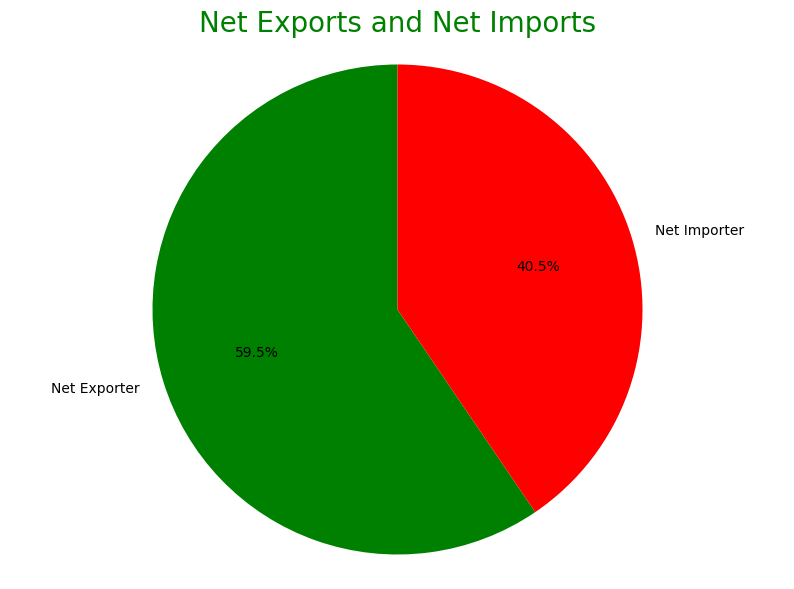

In [85]:
plt.figure(figsize=(10, 7))
plt.pie(df3['NE/NI'].value_counts(), labels=['Net Exporter', 'Net Importer'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Net Exports and Net Imports', fontdict={'fontsize': 20, 'color': 'green'})
plt.axis('equal')
plt.show()

## 📊 Which are top 10 countries to which India exports more and imoprt less?

<Figure size 1100x700 with 0 Axes>

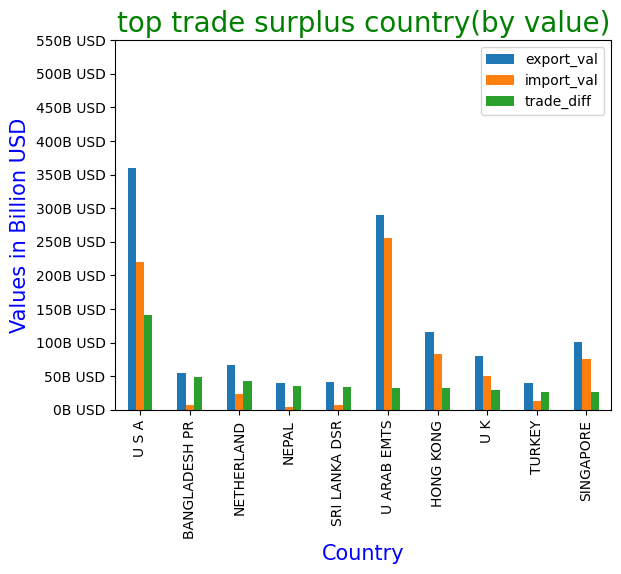

In [86]:
plt.figure(figsize=[11,7])
top10=df3.sort_values(by='trade_diff',ascending=False).head(10)
top10.plot(kind='bar')
ticks = np.arange(0, 600000, 50000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.title('top trade surplus country(by value)',fontdict={'fontsize':20,'color':'green'})
plt.ylabel('Values in Billion USD',fontdict={'fontsize':15,'color':'blue'})
plt.xlabel('Country',fontdict={'fontsize':15,'color':'blue'})
plt.show()

🌟 With USA India's surplus trade has been highest

## 📊 Which are top 10 countries to which India imports more and export less?

<Figure size 1100x700 with 0 Axes>

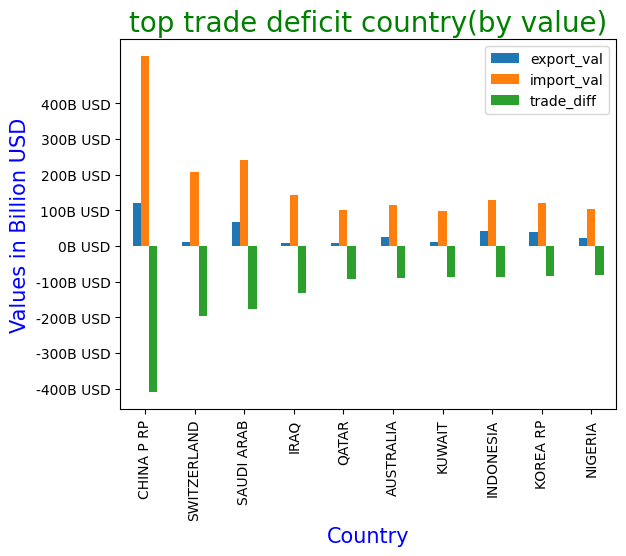

In [87]:
plt.figure(figsize=[11,7])
top10=df3.sort_values(by='trade_diff',ascending=True).head(10)
top10.plot(kind='bar')
ticks = np.arange(-400000, 500000, 100000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.title('top trade deficit country(by value)',fontdict={'fontsize':20,'color':'green'})
plt.ylabel('Values in Billion USD',fontdict={'fontsize':15,'color':'blue'})
plt.xlabel('Country',fontdict={'fontsize':15,'color':'blue'})
plt.show()

🌟 With China India's deficit trade has been highest

## 📊 Which countries are  India's top 10 trade partner?

In [88]:
df3['total trade']=df3['export_val']+df3['import_val']
df3.head()

,export_val,import_val,trade_diff,NE/NI,total trade
country,,,,,
AFGHANISTAN,4760.19,2686.62,2073.57,NE,7446.81
ALBANIA,196.51,524.18,-327.67,NI,720.69
ALGERIA,8232.24,10185.73,-1953.49,NI,18417.97
AMERI SAMOA,3.40,5.82,-2.42,NI,9.22
ANDORRA,6.28,5.45,0.83,NE,11.73


<Figure size 1100x700 with 0 Axes>

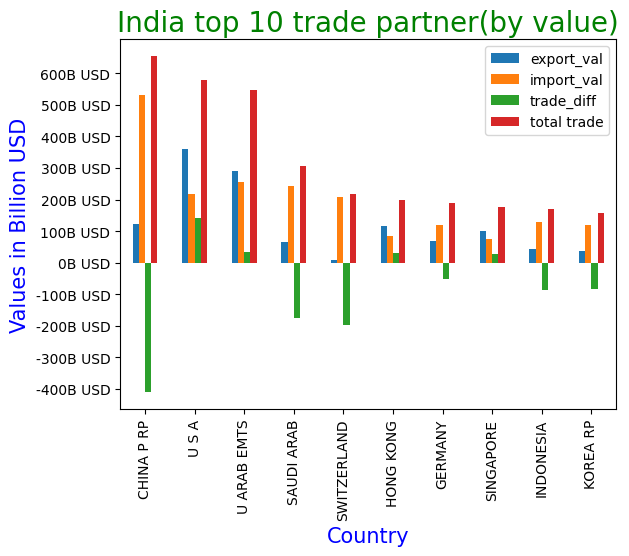

In [89]:
plt.figure(figsize=[11,7])
df3.sort_values(by='total trade',ascending=False).head(10).plot.bar()
ticks = np.arange(-400000, 700000, 100000)
labels = ["{}B USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.title('India top 10 trade partner(by value)',fontdict={'fontsize':20,'color':'green'})
plt.ylabel('Values in Billion USD',fontdict={'fontsize':15,'color':'blue'})
plt.xlabel('Country',fontdict={'fontsize':15,'color':'blue'})
plt.show()

# 4 Commercial relations with Vietnam and China

- Export dataset grouped by country and year

In [90]:
exp_grpby_yr=exp.groupby(by=['country','year'])['value'].sum()
exp_grpby_yr.head()

country      year
AFGHANISTAN  2010    422.31
             2011    510.81
             2012    472.55
             2013    474.26
             2014    422.48
Name: value, dtype: float64

- Import dataset grouped by country and year

In [91]:
imp_grpby_yr=imp.groupby(by=['country','year'])['value'].sum()
imp_grpby_yr.head()

country      year
AFGHANISTAN  2010    146.01
             2011    132.49
             2012    159.53
             2013    208.76
             2014    261.92
Name: value, dtype: float64

- Merge both dataset which grouped by country and year both

In [92]:
merged_grp=pd.merge(exp_grpby_yr,imp_grpby_yr,on=['country','year'])
merged_grp.head()


value_x  value_y
country     year                  
AFGHANISTAN 2010   422.31   146.01
            2011   510.81   132.49
            2012   472.55   159.53
            2013   474.26   208.76
            2014   422.48   261.92

- Reseting index

In [93]:
merged_grp.reset_index(inplace=True)

- Rename column names

In [94]:
merged_grp.rename(columns={'value_x':'val_exp','value_y':'val_imp'},inplace=True)
merged_grp.head()

,country,year,val_exp,val_imp
0,AFGHANISTAN,2010,422.31,146.01
1,AFGHANISTAN,2011,510.81,132.49
2,AFGHANISTAN,2012,472.55,159.53
3,AFGHANISTAN,2013,474.26,208.76
4,AFGHANISTAN,2014,422.48,261.92


- Adding columnn net_val

In [95]:
merged_grp['net_trade']=merged_grp['val_exp']-merged_grp['val_imp']
merged_grp.head()

,country,year,val_exp,val_imp,net_trade
0,AFGHANISTAN,2010,422.31,146.01,276.30
1,AFGHANISTAN,2011,510.81,132.49,378.32
2,AFGHANISTAN,2012,472.55,159.53,313.02
3,AFGHANISTAN,2013,474.26,208.76,265.50
4,AFGHANISTAN,2014,422.48,261.92,160.56


## VIETNAM:

In [96]:
VN=merged_grp[merged_grp['country']=='VIETNAM SOC REP']
VN

,country,year,val_exp,val_imp,net_trade
2002,VIETNAM SOC REP,2010,2651.30,1064.84,1586.46
2003,VIETNAM SOC REP,2011,3718.97,1722.79,1996.18
2004,VIETNAM SOC REP,2012,3967.25,2314.67,1652.58
2005,VIETNAM SOC REP,2013,5441.80,2594.16,2847.64
2006,VIETNAM SOC REP,2014,6257.68,3003.28,3254.40
2007,VIETNAM SOC REP,2015,5265.83,2560.30,2705.53
2008,VIETNAM SOC REP,2016,6786.39,3320.50,3465.89
2009,VIETNAM SOC REP,2017,7812.92,5018.42,2794.50
2010,VIETNAM SOC REP,2018,6507.22,7192.15,-684.93


### 📊 LINEPLOT FOR INDIA'S TRADE WITH VIETNAM BETWEEN 2010-2018

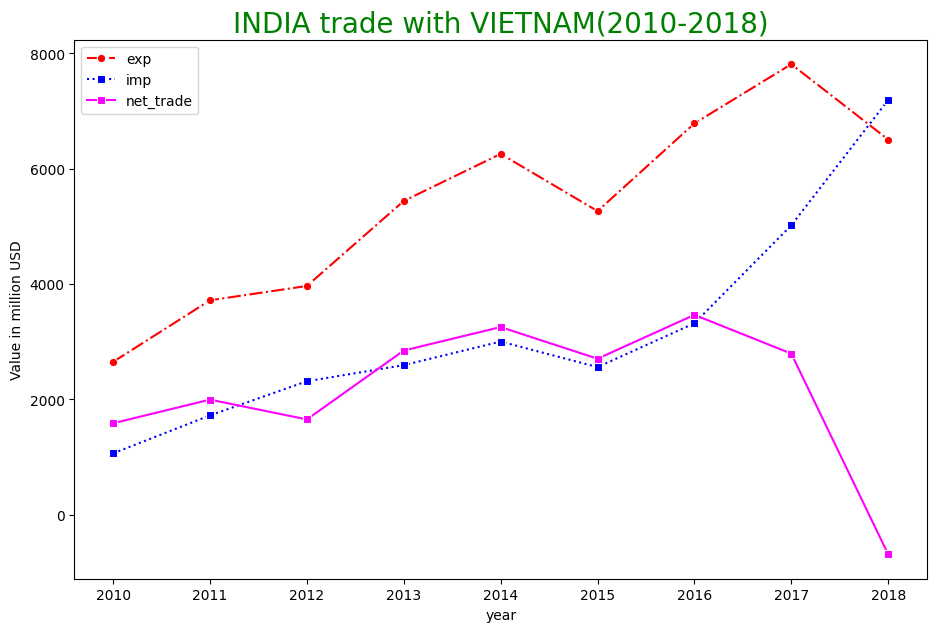

In [97]:
plt.figure(figsize=[11,7])
sns.lineplot(data=VN, x="year", y="val_exp",label='exp',marker='o',color='red',linestyle='-.')
sns.lineplot(data=VN, x="year", y="val_imp",label='imp',marker='s',color='blue',linestyle=':')
sns.lineplot(data=VN, x="year", y="net_trade",label='net_trade',marker='s',color='magenta',linestyle='-')
plt.title('INDIA trade with VIETNAM(2010-2018)',fontdict={'fontsize':20,'color':'green'})
plt.ylabel('Value in million USD')
plt.legend()
plt.show()

#### 🎯 **Key insight:**
1. Export Trend (exp):
Exports started at around 2000 million USD in 2010 and showed a general upward trend, peaking at approximately 7500-8000 million USD in 2017.
There was a slight dip in 2014-2015 (around 6000 million USD), followed by a strong recovery and growth through 2017.
A decline is observed in 2018, dropping to around 6000 million USD.
2. Import Trend (imp):
Imports began at around 1000 million USD in 2010 and increased steadily, reaching a peak of about 4000-4500 million USD around 2016-2017.
After 2017, imports declined sharply to below 1000 million USD by 2018.
3. Net Trade Trend (nettrade):
Net trade started positive (around 1000 million USD) in 2010, indicating a trade surplus.
It fluctuated around 2000-3000 million USD from 2011 to 2015, with a peak around 2013-2014.
A significant increase occurred from 2016 to 2017, reaching a high of approximately 4000-4500 million USD, reflecting a growing trade surplus.
The net trade dropped sharply in 2018, aligning with the decline in exports and imports, ending near 5000 million USD.
### ✅ **Conclusion:**
The trade balance (net trade) has generally been positive throughout the period, indicating that India’s exports to Vietnam consistently exceeded its imports.
The most notable growth in the trade surplus occurred between 2016 and 2017, driven by a rise in exports and a temporary peak in imports.
The sharp decline in 2018 for both imports and net trade suggests a potential economic shift or policy change affecting trade with Vietnam.

### 📊 Visualizing Distributions with Histograms

- Plot histograms for all numerical columns

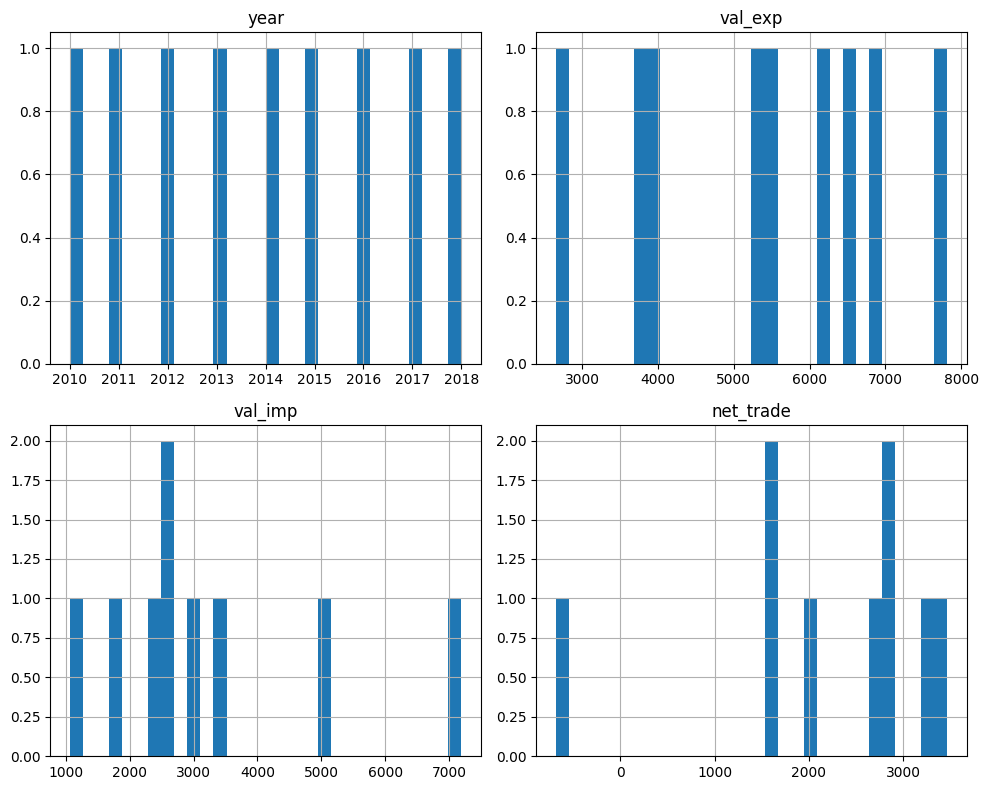

In [98]:
VN.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

- Plot box plots for numerical columns

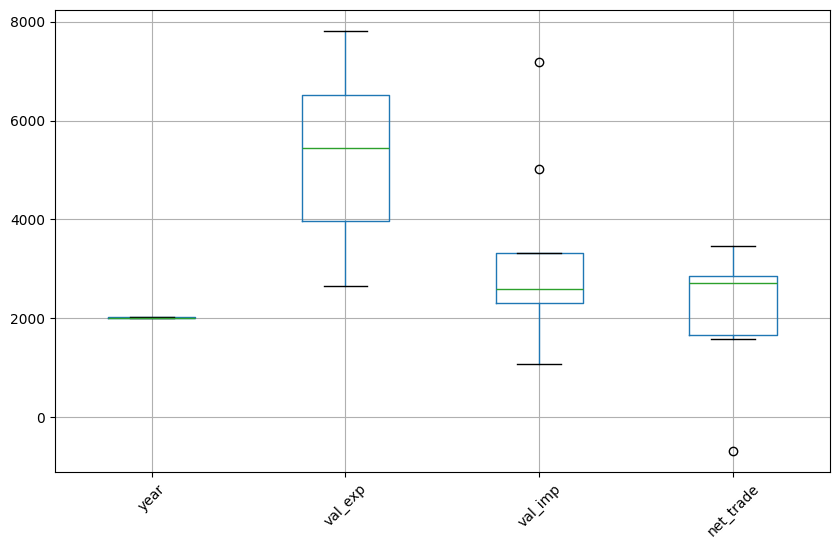

In [99]:
VN.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

#### 🎯 **Key insight:**
1. Year:
The histogram shows a uniform distribution with values close to 1.0 across all years (2010–2018).
There are no significant deviations or extreme values.
Insight: No outliers are present, so removal is unnecessary.
2. Val_exp (Export Value):
The histogram is concentrated around 1.0, with a slight spread across values from 3000 to 8000 million USD.
There are no extreme values or long tails indicating outliers.
Insight: The distribution appears normal with no significant outliers requiring removal.
3. Val_imp (Import Value):
The histogram shows a peak around 1.0–1.75, with most values clustered between 1000 and 4000 million USD.
There are no extreme values extending beyond the main distribution.
Insight: No clear outliers are visible, so removal is likely unnecessary.
4. Net_trade:
The histogram is centered around 1.0–2.0, with values ranging from 0 to approximately 3000 million USD.
There are no extreme outliers; the distribution appears consistent with the range of net trade values.
Insight: No significant outliers are present.
#### ✅ **Conclusion:**
The histograms do not show any significant outliers (e.g., values far beyond the interquartile range or main distribution). The data appears to be well-behaved, with values staying within expected ranges for trade data over the years 2010–2018.

🧾 Converting the boolean into binary values

In [100]:
numerical_cols = ['year', 'val_exp', 'val_imp', 'net_trade']
VN_numerical = VN[numerical_cols]

In [101]:
VN.head()

,country,year,val_exp,val_imp,net_trade
2002,VIETNAM SOC REP,2010,2651.30,1064.84,1586.46
2003,VIETNAM SOC REP,2011,3718.97,1722.79,1996.18
2004,VIETNAM SOC REP,2012,3967.25,2314.67,1652.58
2005,VIETNAM SOC REP,2013,5441.80,2594.16,2847.64
2006,VIETNAM SOC REP,2014,6257.68,3003.28,3254.40


### 🧮Correlation Analysis

In [102]:
VN_corr = VN_numerical.corr()
print(VN_corr)

               year   val_exp   val_imp  net_trade
year       1.000000  0.909705  0.893869  -0.115783
val_exp    0.909705  1.000000  0.747633   0.218009
val_imp    0.893869  0.747633  1.000000  -0.485147
net_trade -0.115783  0.218009 -0.485147   1.000000


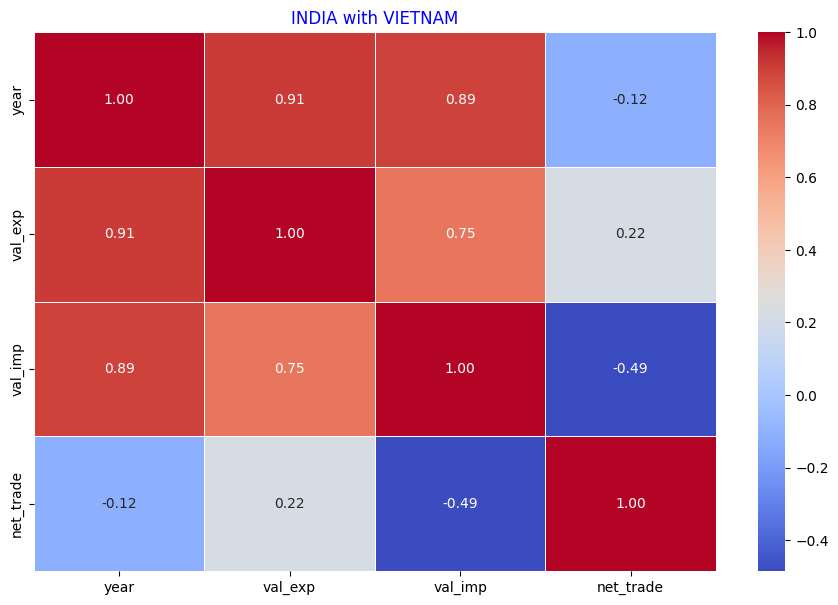

In [103]:
plt.figure(figsize=(11, 7))
sns.heatmap(VN_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for VIETNAM Trade Data')
plt.title('INDIA with VIETNAM',color='Blue')
plt.show()

#### 🎯 **Key insight:**
1. Year:
year has a strong positive correlation with val_exp (0.91), indicating that export values tend to increase over time.
year shows a moderate positive correlation with val_imp (0.89), suggesting a general increase in import values over the years.
year has a weak negative correlation with net_trade (-0.12), implying that the net trade balance does not strongly trend with time and may even slightly decrease.
2. Val_exp (Export Value):
val_exp has a perfect correlation with itself (1.00), as expected.
It shows a strong positive correlation with val_imp (0.75), indicating that higher export values are associated with higher import values.
The correlation with net_trade is moderate positive (0.22), suggesting that increases in exports contribute to a positive net trade balance, though the effect is not overwhelming.
3. Val_imp (Import Value):
val_imp has a perfect correlation with itself (1.00).
It has a moderate positive correlation with val_exp (0.75), reinforcing the mutual growth trend between imports and exports.
It shows a moderate negative correlation with net_trade (-0.49), indicating that higher imports tend to reduce the net trade surplus, which makes sense as net trade is typically exports minus imports.
4. Net_trade:
net_trade has a perfect correlation with itself (1.00).
It has a weak positive correlation with val_exp (0.22), suggesting that exports have a limited direct impact on the net trade balance.
It has a moderate negative correlation with val_imp (-0.49), highlighting that increases in imports reduce the net trade surplus.
#### ✅ **Conclusion:**
- The strong positive correlation between year and both val_exp (0.91) and val_imp (0.89) indicates a steady growth in trade volume (exports and imports) during 2010-2018.
- The negative correlation between net_trade and val_imp (-0.49) is the main driver of the net trade balance, outweighing the positive impact of val_exp (0.22), indicating that import growth has a more significant impact on reducing the trade surplus.

In [104]:
df_VNE= exp[exp['country'] == 'VIETNAM SOC REP']

In [105]:
df_VNE.head()

,HSCode,Commodity,value,country,year,CommodityGroup
15506,2,MEAT AND EDIBLE MEAT OFFAL.,1710.22,VIETNAM SOC REP,2018,Animal & Animal Products
15507,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",988.04,VIETNAM SOC REP,2018,Animal & Animal Products
15508,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,4.43,VIETNAM SOC REP,2018,Animal & Animal Products
15509,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",60.81,VIETNAM SOC REP,2018,Animal & Animal Products
15510,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.25,VIETNAM SOC REP,2018,Vegetable Products


In [106]:
df_VNI= imp[imp['country'] == 'VIETNAM SOC REP']
df_VNI.head()

,HSCode,Commodity,value,country,year,CommodityGroup
8475,1,LIVE ANIMALS.,0.00,VIETNAM SOC REP,2018,Textiles
8476,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",23.95,VIETNAM SOC REP,2018,Footwear / Headgear
8477,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,0.08,VIETNAM SOC REP,2018,Footwear / Headgear
8478,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.08,VIETNAM SOC REP,2018,Footwear / Headgear
8479,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.04,VIETNAM SOC REP,2018,Footwear / Headgear


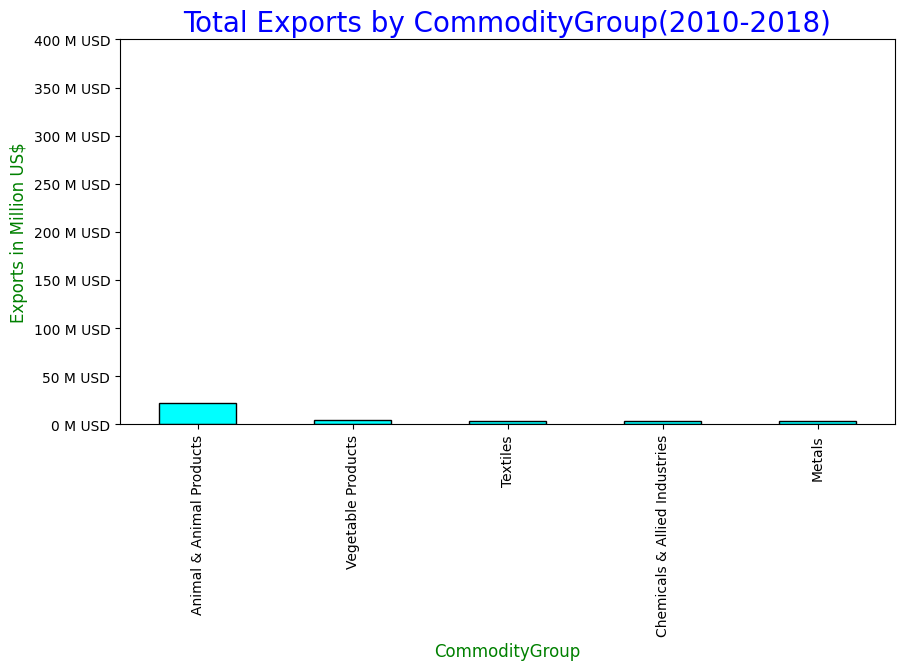

In [107]:
plt.figure(figsize=[10,5])
a=df_VNE.groupby(by=['CommodityGroup'])['value'].sum().sort_values(ascending=False).head(5)
a.plot(kind='bar',color='cyan',edgecolor='black')
plt.xlabel('CommodityGroup',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Exports in Million US$',fontdict={'fontsize': 12,'color':'green'})
plt.title('Total Exports by CommodityGroup(2010-2018)',fontdict={'fontsize': 20,'color':'Blue'})
ticks = np.arange(0, 450000, 50000)
labels = ["{} M USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

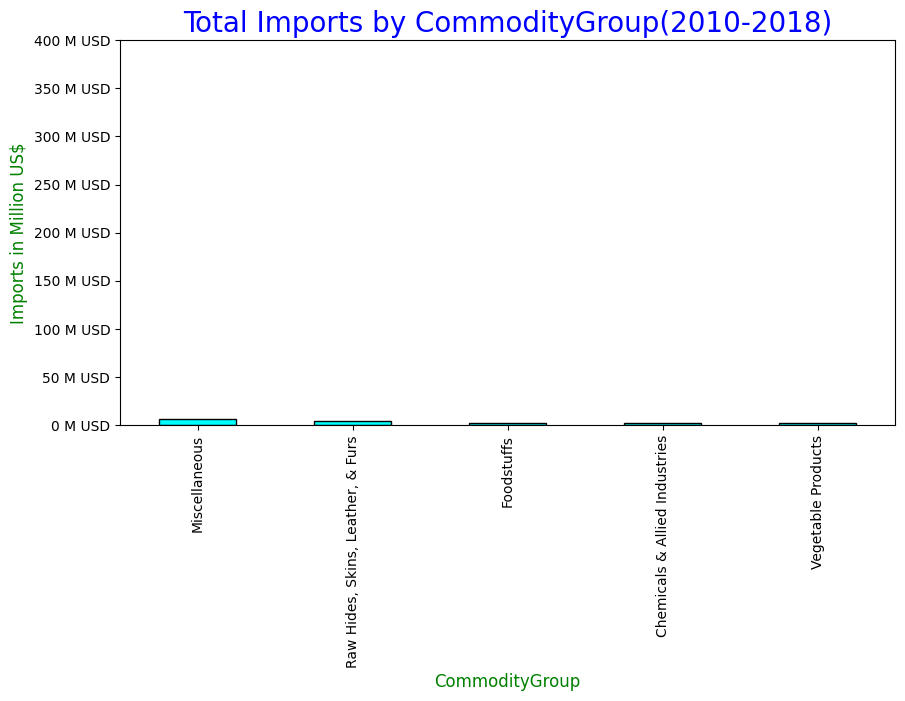

In [108]:
plt.figure(figsize=[10,5])
a=df_VNI.groupby(by=['CommodityGroup'])['value'].sum().sort_values(ascending=False).head(5)
a.plot(kind='bar',color='cyan',edgecolor='black')
plt.xlabel('CommodityGroup',fontdict={'fontsize': 12,'color':'green'})
plt.ylabel('Imports in Million US$',fontdict={'fontsize': 12,'color':'green'})
plt.title('Total Imports by CommodityGroup(2010-2018)',fontdict={'fontsize': 20,'color':'Blue'})
ticks = np.arange(0, 450000, 50000)
labels = ["{} M USD".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

## CHINA:

In [109]:
CHINA=merged_grp[merged_grp['country']=='CHINA P RP']
CHINA

,country,year,val_exp,val_imp,net_trade
378,CHINA P RP,2010,14168.65,43479.39,-29310.74
379,CHINA P RP,2011,18076.34,55313.17,-37236.83
380,CHINA P RP,2012,13534.66,52247.97,-38713.31
381,CHINA P RP,2013,14824.16,51034.30,-36210.14
382,CHINA P RP,2014,11934.07,60412.84,-48478.77
383,CHINA P RP,2015,9011.19,61707.54,-52696.35
384,CHINA P RP,2016,10171.66,61282.66,-51111.00
385,CHINA P RP,2017,13333.33,76380.35,-63047.02
386,CHINA P RP,2018,16751.94,70319.29,-53567.35


In [110]:
CHINA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 378 to 386
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    9 non-null      object 
 1   year       9 non-null      int64  
 2   val_exp    9 non-null      float64
 3   val_imp    9 non-null      float64
 4   net_trade  9 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 432.0+ bytes


### 📊 LINEPLOT FOR INDIA'S TRADE WITH CHINA BETWEEN 2010-2018

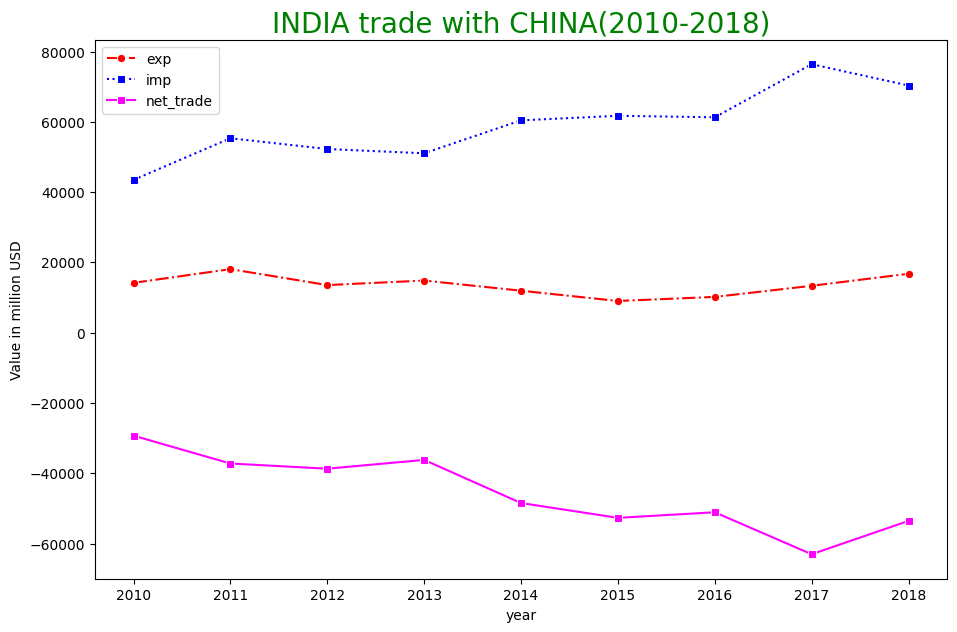

In [111]:
plt.figure(figsize=[11,7])

sns.lineplot(data=CHINA, x="year", y="val_exp",label='exp',marker='o',color='red',linestyle='-.')
sns.lineplot(data=CHINA, x="year", y="val_imp",label='imp',marker='s',color='blue',linestyle=':')
sns.lineplot(data=CHINA, x="year", y="net_trade",label='net_trade',marker='s',color='magenta',linestyle='-')
plt.title('INDIA trade with CHINA(2010-2018)',fontdict={'fontsize':20,'color':'green'})
plt.ylabel('Value in million USD')
plt.legend()
plt.show()

### 📊 Visualizing Distributions with Histograms

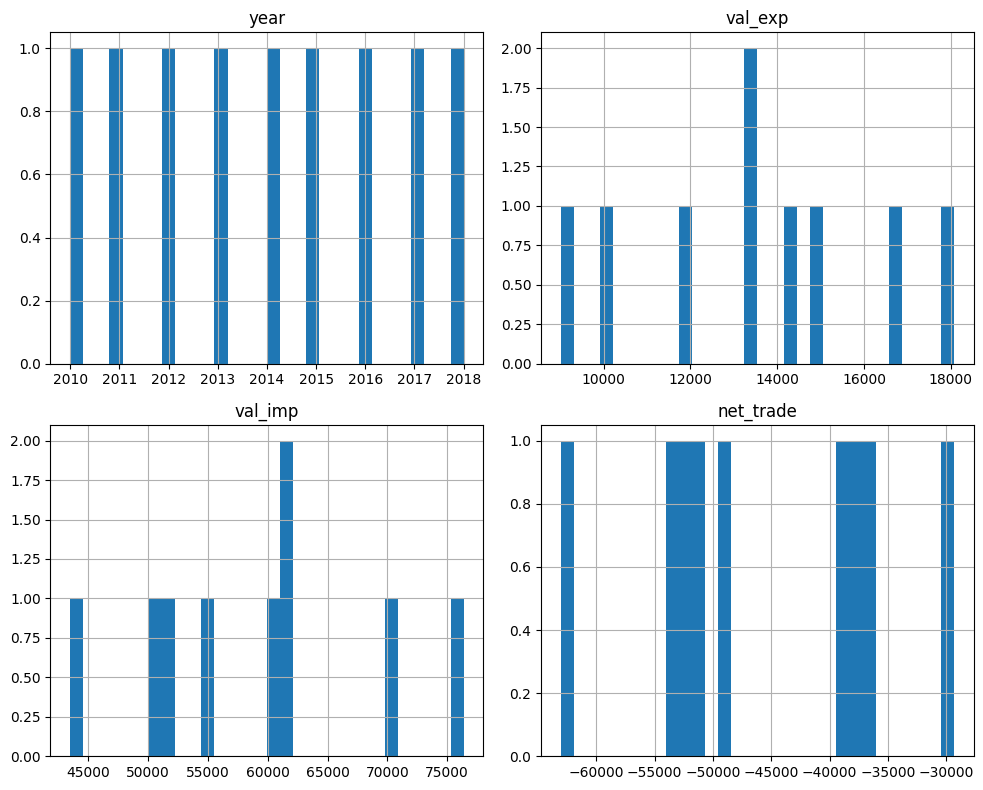

In [112]:
CHINA.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

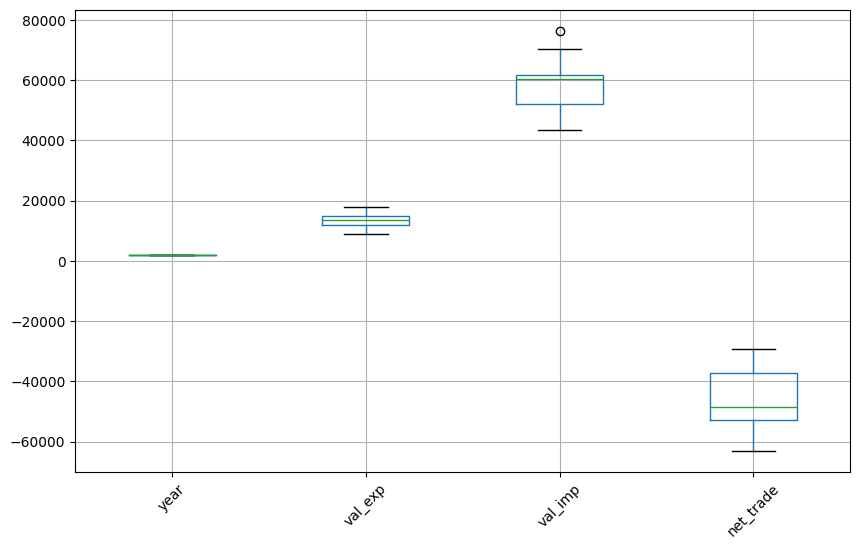

In [113]:
CHINA.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

#### 🎯 **Key insight:**
1. Year:
The histogram shows a uniform distribution with values close to 1.0 across all years (2010–2018).
There are no significant deviations or extreme values.
Insight: No outliers are present, so removal is unnecessary.
2. Val_exp (Export Value):
The dip in 2014-2015 and the peak in 2017 are significant variations, but they align with a general upward trend. The 2018 decline (from 8000 to 6000 million USD) is a notable drop
3. Val_imp (Import Value):
The sharp decline in 2018 (from 4500 to below 1000 million USD) is a dramatic deviation from the prior upward trend.
4. Net_trade:
The 2017 peak and 2018 drop (though still positive at 5000 million USD) are consistent with the export and import trends. The 2018 value is within the range but lower than the peak, suggesting no extreme outlier but a possible trend break
#### ✅ **Conclusion:**
2018 Data Points: The sharp declines in imp (from 4500 to below 1000 million USD) and the moderate drop in exp (from 8000 to 6000 million USD) in 2018 are the most striking deviations. These could be considered outliers if they result from anomalies

### 🧮 The Matrix:

#### 🗃️ Handling outlier

In [114]:
for column in ['val_exp', 'val_imp', 'net_trade']:
    Q1 = CHINA[column].quantile(0.25)
    Q3 = CHINA[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    CHINA_no_outliers = CHINA[(CHINA[column] >= lower_bound) & (CHINA[column] <= upper_bound)]

In [115]:
CHINA_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 378 to 386
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    9 non-null      object 
 1   year       9 non-null      int64  
 2   val_exp    9 non-null      float64
 3   val_imp    9 non-null      float64
 4   net_trade  9 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 432.0+ bytes


📊 Result:

Initial dataset: 117,02 rows

After outlier removal: 113,808 rows

3,215 rows were dropped due to extreme values.

✨ Convert Categorical data to Numeric:

In [116]:
CHINA = pd.get_dummies(CHINA, columns=['country'])

In [117]:
exclued_columns = ['country']
CHINA = CHINA.apply(lambda x: x.astype(int) if x.name not in exclued_columns else x)

In [118]:
CHINA.head()

,year,val_exp,val_imp,net_trade,country_CHINA P RP
378,2010,14168,43479,-29310,1
379,2011,18076,55313,-37236,1
380,2012,13534,52247,-38713,1
381,2013,14824,51034,-36210,1
382,2014,11934,60412,-48478,1


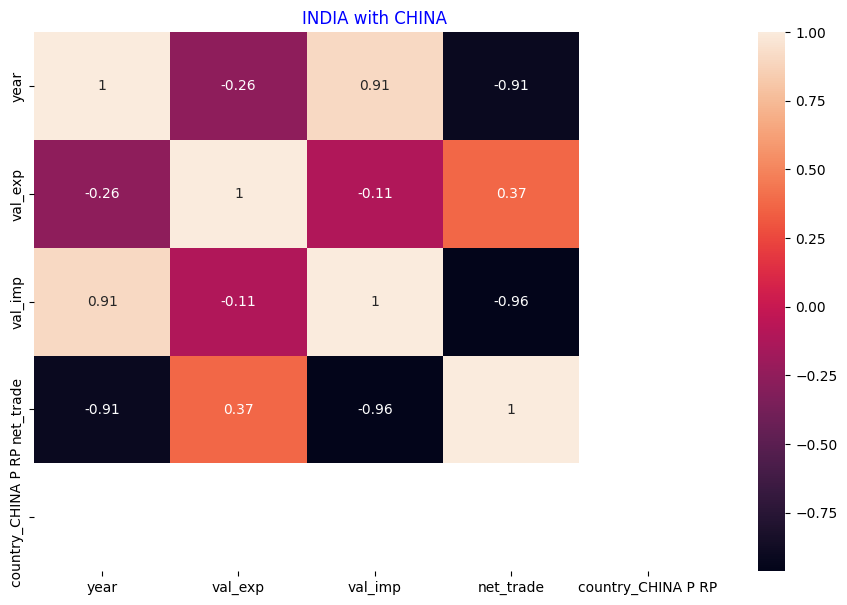

In [119]:
plt.figure(figsize=[11,7])
CHINA_corr=CHINA.corr()
sns.heatmap(CHINA_corr,annot=True)
plt.title('INDIA with CHINA',color='Blue')
plt.show()

#### 🎯 **Key insight:**
1. Strong positive correlations (e.g., 0.91 between year and value of exports, 0.91 between value of imports and net trade) suggest these variables tend to move together.
2. Strong negative correlations (e.g., -0.91 between year and net trade, -0.96 between value of imports and net trade) indicate an inverse relationship.
3. Moderate correlations (e.g., 0.37 between value of exports and net trade, -0.26 between year and value of imports) show weaker but notable relationships.
#### ✅ **Conclusion:**
Based on the correlation matrix, the conclusion is that India's trade dynamics with China exhibit a mix of strong positive and negative relationships. The strong positive correlation between imports and net trade, alongside a strong negative correlation with year and net trade, suggests that as imports increase, net trade tends to decline over time. This indicates a growing trade imbalance, likely driven by increasing imports from China.

In [120]:
import seaborn as sns
import statsmodels.api as sm

In [121]:
x = CHINA[['val_exp',	'val_imp']]
y = CHINA['net_trade']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              net_trade   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.015e+09
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           9.85e-28
Time:                        15:21:42   Log-Likelihood:                -2.5226
No. Observations:                   9   AIC:                             11.05
Df Residuals:                       6   BIC:                             11.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9463      1.111     -0.852      0.4

# 📊 The trade analysis of vital india trade partner(by value),


In [122]:
d=merged_grp.groupby(by=['year','country'])['net_trade'].sum().sort_values(ascending=False)
d.reset_index()
d

,,net_trade
year,country,
2017,U S A,21267.45
2014,U S A,20634.03
2016,U S A,19904.78
2015,U S A,18554.62
2018,U S A,16856.68
...,...,...
2014,CHINA P RP,-48478.77
2016,CHINA P RP,-51111.00
2015,CHINA P RP,-52696.35


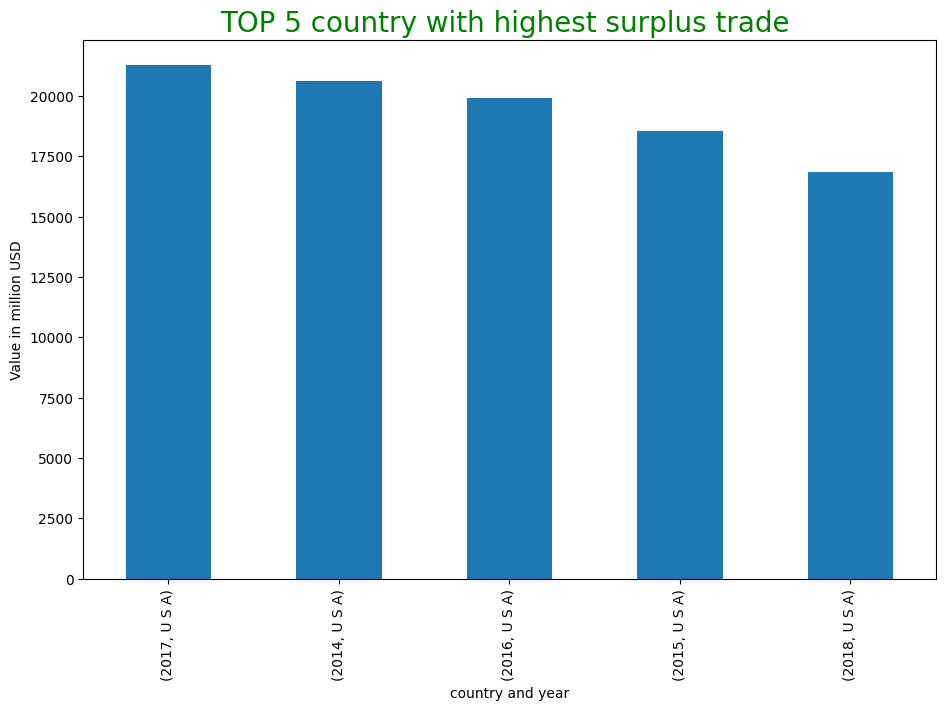

In [123]:
plt.figure(figsize=[11,7])
d=merged_grp.groupby(by=['year','country'])['net_trade'].sum().sort_values(ascending=False).head(5)
d.plot(kind='bar')
plt.title('TOP 5 country with highest surplus trade ',fontdict={'fontsize':20,'color':'green'})
plt.ylabel('Value in million USD')
plt.xlabel('country and year')
plt.show()

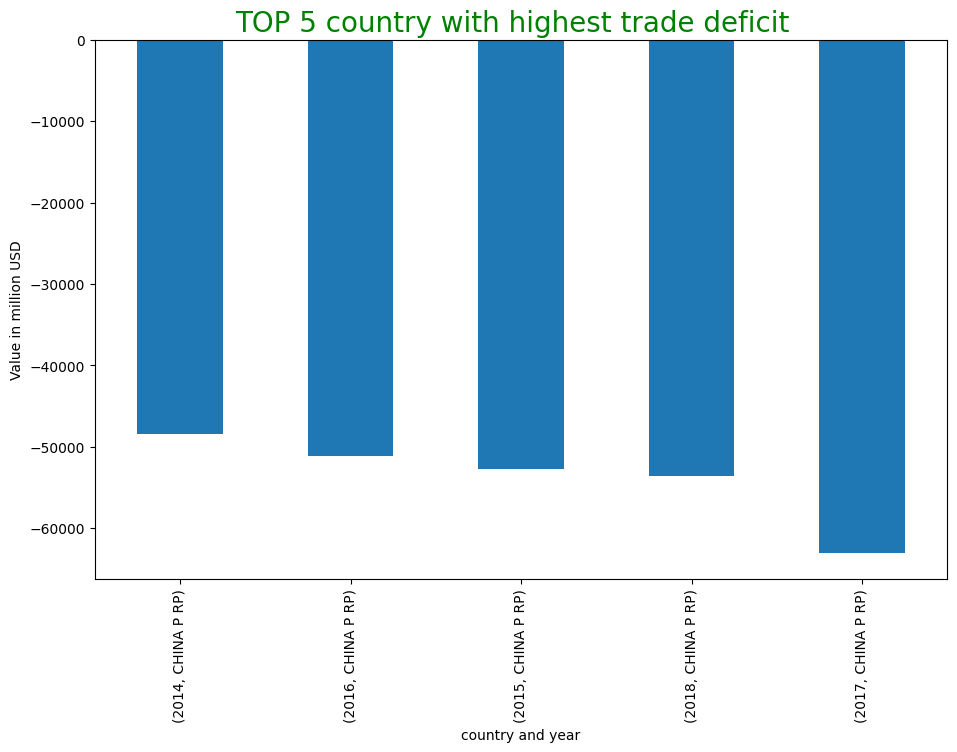

In [124]:
plt.figure(figsize=[11,7])
d=merged_grp.groupby(by=['year','country'])['net_trade'].sum().sort_values(ascending=False).tail(5)
d.plot(kind='bar')
plt.title('TOP 5 country with highest trade deficit  ',fontdict={'fontsize':20,'color':'green'})
plt.ylabel('Value in million USD')
plt.xlabel('country and year')
plt.show()

## 🎯 Key insight:
IN 2017,FOR INDIA TRADE DEFICIT WAS HIGHEST(WITH CHINA) AND TRADE SURPLUS(WITH USA) AS WELL

In [127]:
import plotly.express as px

In [133]:
merged_grp1 = merged_grp.copy()

In [134]:
merged_grp1['country'] = merged_grp1['country'].replace('U S A', 'USA')

In [135]:
export_countries = merged_grp1.groupby('country', as_index=False).agg({'val_exp': 'sum'})
px.choropleth(export_countries, locations='country', color='val_exp', locationmode='country names')

In [136]:
import_countries = merged_grp1.groupby('country', as_index=False).agg({'val_imp': 'sum'})
px.choropleth(import_countries, locations='country', color='val_imp', locationmode='country names')